In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score
from IPython.core.interactiveshell import InteractiveShell
%matplotlib inline

In [2]:
InteractiveShell.ast_node_interactivity = "all"

# Read files

###### 2016 files 

In [3]:
#Read the csv file
#The csv file that contains the log error, which calculated 
#by the formula logerror = log(Zestimate) - log(Saleprice)
logerror_2016 = pd.read_csv('F:/Thinkful/Datasets/zillow prize/train_2016_v2.csv')
df_2016 = pd.read_csv('F:/Thinkful/Datasets/zillow prize/properties_2016.csv')

logerror_2016.head()
df_2016.head()

df_merge2016 = pd.merge(logerror_2016, df_2016, on='parcelid', how='outer')
print(df_merge2016.shape)
df_merge2016.head()

train_2016 = df_merge2016[df_merge2016.logerror.notnull()]
print(train_2016.shape)
train_2016.head()

pred_2016 = df_merge2016[df_merge2016.logerror.isnull()]
print(pred_2016.shape)
pred_2016.head()

D:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


parcelid  logerror transactiondate
0  11016594    0.0276      2016-01-01
1  14366692   -0.1684      2016-01-01
2  12098116   -0.0040      2016-01-01
3  12643413    0.0218      2016-01-02
4  14432541   -0.0050      2016-01-02

parcelid  airconditioningtypeid  architecturalstyletypeid  basementsqft  \
0  10754147                    NaN                       NaN           NaN   
1  10759547                    NaN                       NaN           NaN   
2  10843547                    NaN                       NaN           NaN   
3  10859147                    NaN                       NaN           NaN   
4  10879947                    NaN                       NaN           NaN   

   bathroomcnt  bedroomcnt  buildingclasstypeid  buildingqualitytypeid  \
0          0.0         0.0                  NaN                    NaN   
1          0.0         0.0                  NaN                    NaN   
2          0.0         0.0                  NaN                    NaN   
3          0.0         0.0                  3.0                    7.0   
4          0.0         0.0                  4.0                    NaN   

   calculatedbathnbr  decktypeid         ...           numberofstories  \
0                NaN         NaN         ...                       NaN   
1                NaN         NaN         ...                       NaN   
2                NaN         NaN         ...                       NaN   
3                NaN         NaN         ...                       1.0   
4                NaN         NaN         ...                       NaN   

   fireplaceflag  structuretaxvaluedollarcnt  taxvaluedollarcnt  \
0            NaN                         NaN                9.0   
1            NaN                         NaN            27516.0   
2            NaN                    650756.0          1413387.0   
3            NaN                    571346.0          1156834.0   
4            NaN                    193796.0           433491.0   

   assessmentyear  landtaxvaluedollarcnt  taxamount  taxdelinquencyflag  \
0          2015.0                    9.0        NaN                 NaN   
1          2015.0                27516.0        NaN                 NaN   
2          2015.0               762631.0   20800.37                 NaN   
3          2015.0               585488.0   14557.57                 NaN   
4          2015.0               239695.0    5725.17                 NaN   

   taxdelinquencyyear  censustractandblock  
0                 NaN                  NaN  
1                 NaN                  NaN  
2                 NaN                  NaN  
3                 NaN                  NaN  
4                 NaN                  NaN  

[5 rows x 58 columns]

(2985342, 60)


parcelid  logerror transactiondate  airconditioningtypeid  \
0  11016594    0.0276      2016-01-01                    1.0   
1  14366692   -0.1684      2016-01-01                    NaN   
2  12098116   -0.0040      2016-01-01                    1.0   
3  12643413    0.0218      2016-01-02                    1.0   
4  14432541   -0.0050      2016-01-02                    NaN   

   architecturalstyletypeid  basementsqft  bathroomcnt  bedroomcnt  \
0                       NaN           NaN          2.0         3.0   
1                       NaN           NaN          3.5         4.0   
2                       NaN           NaN          3.0         2.0   
3                       NaN           NaN          2.0         2.0   
4                       NaN           NaN          2.5         4.0   

   buildingclasstypeid  buildingqualitytypeid         ...           \
0                  NaN                    4.0         ...            
1                  NaN                    NaN         ...            
2                  NaN                    4.0         ...            
3                  NaN                    4.0         ...            
4                  NaN                    NaN         ...            

   numberofstories  fireplaceflag  structuretaxvaluedollarcnt  \
0              NaN            NaN                    122754.0   
1              NaN            NaN                    346458.0   
2              NaN            NaN                     61994.0   
3              NaN            NaN                    171518.0   
4              2.0            NaN                    169574.0   

   taxvaluedollarcnt  assessmentyear  landtaxvaluedollarcnt  taxamount  \
0           360170.0          2015.0               237416.0    6735.88   
1           585529.0          2015.0               239071.0   10153.02   
2           119906.0          2015.0                57912.0   11484.48   
3           244880.0          2015.0                73362.0    3048.74   
4           434551.0          2015.0               264977.0    5488.96   

   taxdelinquencyflag  taxdelinquencyyear  censustractandblock  
0                 NaN                 NaN         6.037107e+13  
1                 NaN                 NaN                  NaN  
2                 NaN                 NaN         6.037464e+13  
3                 NaN                 NaN         6.037296e+13  
4                 NaN                 NaN         6.059042e+13  

[5 rows x 60 columns]

(90275, 60)


parcelid  logerror transactiondate  airconditioningtypeid  \
0  11016594    0.0276      2016-01-01                    1.0   
1  14366692   -0.1684      2016-01-01                    NaN   
2  12098116   -0.0040      2016-01-01                    1.0   
3  12643413    0.0218      2016-01-02                    1.0   
4  14432541   -0.0050      2016-01-02                    NaN   

   architecturalstyletypeid  basementsqft  bathroomcnt  bedroomcnt  \
0                       NaN           NaN          2.0         3.0   
1                       NaN           NaN          3.5         4.0   
2                       NaN           NaN          3.0         2.0   
3                       NaN           NaN          2.0         2.0   
4                       NaN           NaN          2.5         4.0   

   buildingclasstypeid  buildingqualitytypeid         ...           \
0                  NaN                    4.0         ...            
1                  NaN                    NaN         ...            
2                  NaN                    4.0         ...            
3                  NaN                    4.0         ...            
4                  NaN                    NaN         ...            

   numberofstories  fireplaceflag  structuretaxvaluedollarcnt  \
0              NaN            NaN                    122754.0   
1              NaN            NaN                    346458.0   
2              NaN            NaN                     61994.0   
3              NaN            NaN                    171518.0   
4              2.0            NaN                    169574.0   

   taxvaluedollarcnt  assessmentyear  landtaxvaluedollarcnt  taxamount  \
0           360170.0          2015.0               237416.0    6735.88   
1           585529.0          2015.0               239071.0   10153.02   
2           119906.0          2015.0                57912.0   11484.48   
3           244880.0          2015.0                73362.0    3048.74   
4           434551.0          2015.0               264977.0    5488.96   

   taxdelinquencyflag  taxdelinquencyyear  censustractandblock  
0                 NaN                 NaN         6.037107e+13  
1                 NaN                 NaN                  NaN  
2                 NaN                 NaN         6.037464e+13  
3                 NaN                 NaN         6.037296e+13  
4                 NaN                 NaN         6.059042e+13  

[5 rows x 60 columns]

(2895067, 60)


parcelid  logerror transactiondate  airconditioningtypeid  \
90275  10754147       NaN             NaN                    NaN   
90276  10759547       NaN             NaN                    NaN   
90277  10843547       NaN             NaN                    NaN   
90278  10859147       NaN             NaN                    NaN   
90279  10879947       NaN             NaN                    NaN   

       architecturalstyletypeid  basementsqft  bathroomcnt  bedroomcnt  \
90275                       NaN           NaN          0.0         0.0   
90276                       NaN           NaN          0.0         0.0   
90277                       NaN           NaN          0.0         0.0   
90278                       NaN           NaN          0.0         0.0   
90279                       NaN           NaN          0.0         0.0   

       buildingclasstypeid  buildingqualitytypeid         ...           \
90275                  NaN                    NaN         ...            
90276                  NaN                    NaN         ...            
90277                  NaN                    NaN         ...            
90278                  3.0                    7.0         ...            
90279                  4.0                    NaN         ...            

       numberofstories  fireplaceflag  structuretaxvaluedollarcnt  \
90275              NaN            NaN                         NaN   
90276              NaN            NaN                         NaN   
90277              NaN            NaN                    650756.0   
90278              1.0            NaN                    571346.0   
90279              NaN            NaN                    193796.0   

       taxvaluedollarcnt  assessmentyear  landtaxvaluedollarcnt  taxamount  \
90275                9.0          2015.0                    9.0        NaN   
90276            27516.0          2015.0                27516.0        NaN   
90277          1413387.0          2015.0               762631.0   20800.37   
90278          1156834.0          2015.0               585488.0   14557.57   
90279           433491.0          2015.0               239695.0    5725.17   

       taxdelinquencyflag  taxdelinquencyyear  censustractandblock  
90275                 NaN                 NaN                  NaN  
90276                 NaN                 NaN                  NaN  
90277                 NaN                 NaN                  NaN  
90278                 NaN                 NaN                  NaN  
90279                 NaN                 NaN                  NaN  

[5 rows x 60 columns]

###### 2017 files

In [4]:
logerror_2017 = pd.read_csv('F:/Thinkful/Datasets/zillow prize/train_2017.csv')
df_2017 = pd.read_csv('F:/Thinkful/Datasets/zillow prize/properties_2017.csv')

logerror_2017.head()
df_2017.head()

df_merge2017 = pd.merge(logerror_2017, df_2017, on='parcelid', how='outer')
print(df_merge2017.shape)
df_merge2017.head()

train_2017 = df_merge2017[df_merge2017.logerror.notnull()]
print(train_2017.shape)
train_2017.head()

pred_2017 = df_merge2017[df_merge2017.logerror.isnull()]
print(pred_2017.shape)
pred_2017.head()

D:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


parcelid  logerror transactiondate
0  14297519  0.025595      2017-01-01
1  17052889  0.055619      2017-01-01
2  14186244  0.005383      2017-01-01
3  12177905 -0.103410      2017-01-01
4  10887214  0.006940      2017-01-01

parcelid  airconditioningtypeid  architecturalstyletypeid  basementsqft  \
0  10754147                    NaN                       NaN           NaN   
1  10759547                    NaN                       NaN           NaN   
2  10843547                    NaN                       NaN           NaN   
3  10859147                    NaN                       NaN           NaN   
4  10879947                    NaN                       NaN           NaN   

   bathroomcnt  bedroomcnt  buildingclasstypeid  buildingqualitytypeid  \
0          0.0         0.0                  NaN                    NaN   
1          0.0         0.0                  NaN                    NaN   
2          0.0         0.0                  5.0                    NaN   
3          0.0         0.0                  3.0                    6.0   
4          0.0         0.0                  4.0                    NaN   

   calculatedbathnbr  decktypeid         ...           numberofstories  \
0                NaN         NaN         ...                       NaN   
1                NaN         NaN         ...                       NaN   
2                NaN         NaN         ...                       1.0   
3                NaN         NaN         ...                       1.0   
4                NaN         NaN         ...                       1.0   

   fireplaceflag  structuretaxvaluedollarcnt  taxvaluedollarcnt  \
0            NaN                         NaN                9.0   
1            NaN                         NaN            27516.0   
2            NaN                    660680.0          1434941.0   
3            NaN                    580059.0          1174475.0   
4            NaN                    196751.0           440101.0   

   assessmentyear  landtaxvaluedollarcnt  taxamount  taxdelinquencyflag  \
0          2016.0                    9.0        NaN                 NaN   
1          2015.0                27516.0        NaN                 NaN   
2          2016.0               774261.0   20800.37                 NaN   
3          2016.0               594416.0   14557.57                 NaN   
4          2016.0               243350.0    5725.17                 NaN   

   taxdelinquencyyear  censustractandblock  
0                 NaN                  NaN  
1                 NaN                  NaN  
2                 NaN                  NaN  
3                 NaN                  NaN  
4                 NaN                  NaN  

[5 rows x 58 columns]

(2985416, 60)


parcelid  logerror transactiondate  airconditioningtypeid  \
0  14297519  0.025595      2017-01-01                    NaN   
1  17052889  0.055619      2017-01-01                    NaN   
2  14186244  0.005383      2017-01-01                    NaN   
3  12177905 -0.103410      2017-01-01                    NaN   
4  10887214  0.006940      2017-01-01                    1.0   

   architecturalstyletypeid  basementsqft  bathroomcnt  bedroomcnt  \
0                       NaN           NaN          3.5         4.0   
1                       NaN           NaN          1.0         2.0   
2                       NaN           NaN          2.0         3.0   
3                       NaN           NaN          3.0         4.0   
4                       NaN           NaN          3.0         3.0   

   buildingclasstypeid  buildingqualitytypeid         ...           \
0                  NaN                    NaN         ...            
1                  NaN                    NaN         ...            
2                  NaN                    NaN         ...            
3                  NaN                    8.0         ...            
4                  NaN                    8.0         ...            

   numberofstories  fireplaceflag  structuretaxvaluedollarcnt  \
0              NaN            NaN                    485713.0   
1              1.0            NaN                     88000.0   
2              1.0            NaN                     85289.0   
3              NaN            NaN                    108918.0   
4              NaN            NaN                     73681.0   

   taxvaluedollarcnt  assessmentyear  landtaxvaluedollarcnt  taxamount  \
0          1023282.0          2016.0               537569.0   11013.72   
1           464000.0          2016.0               376000.0    5672.48   
2           564778.0          2016.0               479489.0    6488.30   
3           145143.0          2016.0                36225.0    1777.51   
4           119407.0          2016.0                45726.0    1533.89   

   taxdelinquencyflag  taxdelinquencyyear  censustractandblock  
0                 NaN                 NaN         6.059063e+13  
1                 NaN                 NaN         6.111001e+13  
2                 NaN                 NaN         6.059022e+13  
3                 NaN                 NaN         6.037300e+13  
4                 NaN                 NaN         6.037124e+13  

[5 rows x 60 columns]

(77613, 60)


parcelid  logerror transactiondate  airconditioningtypeid  \
0  14297519  0.025595      2017-01-01                    NaN   
1  17052889  0.055619      2017-01-01                    NaN   
2  14186244  0.005383      2017-01-01                    NaN   
3  12177905 -0.103410      2017-01-01                    NaN   
4  10887214  0.006940      2017-01-01                    1.0   

   architecturalstyletypeid  basementsqft  bathroomcnt  bedroomcnt  \
0                       NaN           NaN          3.5         4.0   
1                       NaN           NaN          1.0         2.0   
2                       NaN           NaN          2.0         3.0   
3                       NaN           NaN          3.0         4.0   
4                       NaN           NaN          3.0         3.0   

   buildingclasstypeid  buildingqualitytypeid         ...           \
0                  NaN                    NaN         ...            
1                  NaN                    NaN         ...            
2                  NaN                    NaN         ...            
3                  NaN                    8.0         ...            
4                  NaN                    8.0         ...            

   numberofstories  fireplaceflag  structuretaxvaluedollarcnt  \
0              NaN            NaN                    485713.0   
1              1.0            NaN                     88000.0   
2              1.0            NaN                     85289.0   
3              NaN            NaN                    108918.0   
4              NaN            NaN                     73681.0   

   taxvaluedollarcnt  assessmentyear  landtaxvaluedollarcnt  taxamount  \
0          1023282.0          2016.0               537569.0   11013.72   
1           464000.0          2016.0               376000.0    5672.48   
2           564778.0          2016.0               479489.0    6488.30   
3           145143.0          2016.0                36225.0    1777.51   
4           119407.0          2016.0                45726.0    1533.89   

   taxdelinquencyflag  taxdelinquencyyear  censustractandblock  
0                 NaN                 NaN         6.059063e+13  
1                 NaN                 NaN         6.111001e+13  
2                 NaN                 NaN         6.059022e+13  
3                 NaN                 NaN         6.037300e+13  
4                 NaN                 NaN         6.037124e+13  

[5 rows x 60 columns]

(2907803, 60)


parcelid  logerror transactiondate  airconditioningtypeid  \
77613  10754147       NaN             NaN                    NaN   
77614  10759547       NaN             NaN                    NaN   
77615  10843547       NaN             NaN                    NaN   
77616  10859147       NaN             NaN                    NaN   
77617  10879947       NaN             NaN                    NaN   

       architecturalstyletypeid  basementsqft  bathroomcnt  bedroomcnt  \
77613                       NaN           NaN          0.0         0.0   
77614                       NaN           NaN          0.0         0.0   
77615                       NaN           NaN          0.0         0.0   
77616                       NaN           NaN          0.0         0.0   
77617                       NaN           NaN          0.0         0.0   

       buildingclasstypeid  buildingqualitytypeid         ...           \
77613                  NaN                    NaN         ...            
77614                  NaN                    NaN         ...            
77615                  5.0                    NaN         ...            
77616                  3.0                    6.0         ...            
77617                  4.0                    NaN         ...            

       numberofstories  fireplaceflag  structuretaxvaluedollarcnt  \
77613              NaN            NaN                         NaN   
77614              NaN            NaN                         NaN   
77615              1.0            NaN                    660680.0   
77616              1.0            NaN                    580059.0   
77617              1.0            NaN                    196751.0   

       taxvaluedollarcnt  assessmentyear  landtaxvaluedollarcnt  taxamount  \
77613                9.0          2016.0                    9.0        NaN   
77614            27516.0          2015.0                27516.0        NaN   
77615          1434941.0          2016.0               774261.0   20800.37   
77616          1174475.0          2016.0               594416.0   14557.57   
77617           440101.0          2016.0               243350.0    5725.17   

       taxdelinquencyflag  taxdelinquencyyear  censustractandblock  
77613                 NaN                 NaN                  NaN  
77614                 NaN                 NaN                  NaN  
77615                 NaN                 NaN                  NaN  
77616                 NaN                 NaN                  NaN  
77617                 NaN                 NaN                  NaN  

[5 rows x 60 columns]

In [5]:
#Combine dataframes of two years together.
train_201617 = pd.concat([train_2016,train_2017], join='outer')
train_201617 = train_201617.reset_index(drop=True)
train_201617

parcelid  logerror transactiondate  airconditioningtypeid  \
0       11016594  0.027600      2016-01-01                    1.0   
1       14366692 -0.168400      2016-01-01                    NaN   
2       12098116 -0.004000      2016-01-01                    1.0   
3       12643413  0.021800      2016-01-02                    1.0   
4       14432541 -0.005000      2016-01-02                    NaN   
5       11509835 -0.270500      2016-01-02                    1.0   
6       12286022  0.044000      2016-01-02                    NaN   
7       17177301  0.163800      2016-01-02                    NaN   
8       14739064 -0.003000      2016-01-02                    NaN   
9       14677559  0.084300      2016-01-03                    NaN   
10      10854446  0.382500      2016-01-03                    NaN   
11      11672170 -0.016100      2016-01-03                    1.0   
12      10949761  0.034400      2016-01-03                    NaN   
13      14665244  0.081600      2016-01-03                    NaN   
14      14148540 -0.045000      2016-01-03                    NaN   
15      14057104  0.002000      2016-01-03                    5.0   
16      17296797  0.044000      2016-01-03                    NaN   
17      12524288 -0.041900      2016-01-03                    NaN   
18      14091502 -0.002000      2016-01-03                    NaN   
19      10815909  0.010000      2016-01-03                    1.0   
20      12453853 -0.038700      2016-01-03                    NaN   
21      14253461  0.021800      2016-01-03                   13.0   
22      14001034  0.014900      2016-01-03                    NaN   
23      11458863  0.115100      2016-01-03                    NaN   
24      13957980 -0.169600      2016-01-03                    NaN   
25      12752047 -0.044000      2016-01-03                    1.0   
26      11188425 -0.074700      2016-01-03                    1.0   
27      14646051  0.008000      2016-01-03                    NaN   
28      10805063  0.001000      2016-01-03                    1.0   
29      12524725 -0.053400      2016-01-03                    NaN   
...          ...       ...             ...                    ...   
167858  12651460  0.094750      2017-09-19                    NaN   
167859  10962691 -0.064765      2017-09-19                    NaN   
167860  11487400  0.046755      2017-09-19                    NaN   
167861  12433997  0.018458      2017-09-19                    NaN   
167862  10855745  0.002138      2017-09-19                    1.0   
167863  12883894  1.285713      2017-09-19                    NaN   
167864  12885530  0.003457      2017-09-19                    NaN   
167865  11490983 -0.036067      2017-09-19                    NaN   
167866  12401161 -0.232215      2017-09-19                    NaN   
167867  11068972  0.015806      2017-09-19                    1.0   
167868  11490089  0.068838      2017-09-19                    NaN   
167869  12406123  0.000099      2017-09-19                    NaN   
167870  12669704  0.047467      2017-09-19                    NaN   
167871  12410050  0.000749      2017-09-19                    NaN   
167872  11953526 -0.159471      2017-09-19                    NaN   
167873  11608641 -0.816510      2017-09-19                    NaN   
167874  11978003 -0.062404      2017-09-19                    1.0   
167875  11318911  0.013268      2017-09-19                    NaN   
167876  10722237  0.052630      2017-09-19                    1.0   
167877  12055795 -0.140881      2017-09-19                    NaN   
167878  12892446  0.319408      2017-09-19                    NaN   
167879  12666457  0.028733      2017-09-19                    NaN   
167880  10858613 -0.075465      2017-09-19                    1.0   
167881  10722691  0.081196      2017-09-19                    1.0   
167882  12412492  0.001082      2017-09-19                    NaN   
167883  10833991 -0.002245      2017-09-20                    1.0   
167884

In [6]:
df_all = pd.concat([df_merge2016,df_merge2017], join='outer')
df_all = df_all.reset_index(drop=True)
df_all

parcelid  logerror transactiondate  airconditioningtypeid  \
0        11016594    0.0276      2016-01-01                    1.0   
1        14366692   -0.1684      2016-01-01                    NaN   
2        12098116   -0.0040      2016-01-01                    1.0   
3        12643413    0.0218      2016-01-02                    1.0   
4        14432541   -0.0050      2016-01-02                    NaN   
5        11509835   -0.2705      2016-01-02                    1.0   
6        12286022    0.0440      2016-01-02                    NaN   
7        17177301    0.1638      2016-01-02                    NaN   
8        14739064   -0.0030      2016-01-02                    NaN   
9        14677559    0.0843      2016-01-03                    NaN   
10       10854446    0.3825      2016-01-03                    NaN   
11       11672170   -0.0161      2016-01-03                    1.0   
12       10949761    0.0344      2016-01-03                    NaN   
13       14665244    0.0816      2016-01-03                    NaN   
14       14148540   -0.0450      2016-01-03                    NaN   
15       14057104    0.0020      2016-01-03                    5.0   
16       17296797    0.0440      2016-01-03                    NaN   
17       12524288   -0.0419      2016-01-03                    NaN   
18       14091502   -0.0020      2016-01-03                    NaN   
19       10815909    0.0100      2016-01-03                    1.0   
20       12453853   -0.0387      2016-01-03                    NaN   
21       14253461    0.0218      2016-01-03                   13.0   
22       14001034    0.0149      2016-01-03                    NaN   
23       11458863    0.1151      2016-01-03                    NaN   
24       13957980   -0.1696      2016-01-03                    NaN   
25       12752047   -0.0440      2016-01-03                    1.0   
26       11188425   -0.0747      2016-01-03                    1.0   
27       14646051    0.0080      2016-01-03                    NaN   
28       10805063    0.0010      2016-01-03                    1.0   
29       12524725   -0.0534      2016-01-03                    NaN   
...           ...       ...             ...                    ...   
5970728  12913028       NaN             NaN                    NaN   
5970729  17212628       NaN             NaN                    NaN   
5970730  12053828       NaN             NaN                    NaN   
5970731  13113429       NaN             NaN                    NaN   
5970732  13113229       NaN             NaN                    NaN   
5970733  13113629       NaN             NaN                    NaN   
5970734  11684429       NaN             NaN                    NaN   
5970735  12250229       NaN             NaN                    NaN   
5970736  11758829       NaN             NaN                    NaN   
5970737  11758629       NaN             NaN                    NaN   
5970738  14430829       NaN             NaN                    NaN   
5970739  13903029       NaN             NaN                    NaN   
5970740  13113430       NaN             NaN                    NaN   
5970741  13113230       NaN             NaN                    NaN   
5970742  13113630       NaN             NaN                    NaN   
5970743  12614630       NaN             NaN                    NaN   
5970744  13108830       NaN             NaN                    NaN   
5970745  10922830       NaN             NaN                    NaN   
5970746  11758630       NaN             NaN                    NaN   
5970747  11505630       NaN             NaN                    NaN   
5970748  14189430       NaN             NaN                    NaN   
5970749  11574030       NaN             NaN                    NaN   
5970750  14430630       NaN             NaN                    NaN   
5970751  13086830       NaN             NaN                    NaN   
5970752  13903030       NaN             NaN                    NaN   
5970753  12170430  

In [7]:
missing_df = df_all.isnull().sum(axis=0).reset_index()
missing_df.columns = ['variable', 'missing_values']
missing_df['filling_factor']=(df_all.shape[0]-missing_df['missing_values'])/df_all.shape[0]*100
missing_df= missing_df.sort_values('filling_factor').reset_index(drop = True)
missing_df

variable  missing_values  filling_factor
0                    storytypeid         5967511        0.054382
1                   basementsqft         5967503        0.054516
2             yardbuildingsqft26         5965465        0.088649
3                  fireplaceflag         5960430        0.172976
4       architecturalstyletypeid         5958634        0.203056
5         typeconstructiontypeid         5957263        0.226018
6           finishedsquarefeet13         5955414        0.256986
7            buildingclasstypeid         5945398        0.424737
8                     decktypeid         5936283        0.577397
9            finishedsquarefeet6         5927273        0.728299
10                  pooltypeid10         5916810        0.903537
11                   poolsizesum         5914835        0.936615
12                   pooltypeid2         5905627        1.090833
13            taxdelinquencyflag         5857759        1.892540
14            taxdelinquencyyear         5857755        1.892607
15                hashottuborspa         5851679        1.994370
16            yardbuildingsqft17         5808809        2.712369
17               transactiondate         5802870        2.811837
18                      logerror         5802870        2.811837
19          finishedsquarefeet15         5589748        6.381267
20          finishedsquarefeet50         5564263        6.808097
21      finishedfloor1squarefeet         5564263        6.808097
22                  fireplacecnt         5344974       10.480813
23           threequarterbathnbr         5342747       10.518112
24                   pooltypeid7         4979342       16.604525
25                       poolcnt         4913530       17.706764
26               numberofstories         4602944       22.908549
27         airconditioningtypeid         4343790       27.248936
28               garagetotalsqft         4196397       29.717517
29                  garagecarcnt         4196397       29.717517
30          regionidneighborhood         3657475       38.743540
31         heatingorsystemtypeid         2294987       61.562887
32         buildingqualitytypeid         2090658       64.985049
33                       unitcnt         2012004       66.302369
34            propertyzoningdesc         2009432       66.345446
35             lotsizesquarefeet          548839       90.807884
36          finishedsquarefeet12          540503       90.947498
37                   fullbathcnt          246082       95.878547
38             calculatedbathnbr          246082       95.878547
39           censustractandblock          150117       97.485797
40         landtaxvaluedollarcnt          127660       97.861913
41                  regionidcity          124977       97.906849
42                     yearbuilt          107772       98.195003
43    structuretaxvaluedollarcnt          101452       98.300852
44  calculatedfinishedsquarefeet          100671       98.313933
45             taxvaluedollarcnt           76817       98.713446
46                     taxamount           54003       99.095542
47                   regionidzip           26695       99.552904
48     propertycountylandusecode           15277       99.744136
49                       roomcnt           14445       99.758071
50                   bathroomcnt           14420       99.758490
51                    bedroomcnt           14396       99.758892
52                assessmentyear           14373       99.759277
53        rawcensustractandblock           14370       99.759327
54                          fips           14370       99.759327
55                      latitude           14370       99.759327
56                     longitude           14370       99.759327
57         propertylandusetypeid           14370       99.759327
58                regionidcounty           14370       99.759327
59                      parcelid               0      100.000000

In [8]:
# missing_df_pred['variable'][0:35].values

In [9]:
# df_pred = df_pred_all.drop(['logerror', 'transactiondate', 'storytypeid', 'basementsqft',
#        'yardbuildingsqft26', 'fireplaceflag', 'architecturalstyletypeid',
#        'typeconstructiontypeid', 'finishedsquarefeet13',
#        'buildingclasstypeid', 'decktypeid', 'finishedsquarefeet6',
#        'pooltypeid10', 'poolsizesum', 'pooltypeid2', 'taxdelinquencyflag',
#        'taxdelinquencyyear', 'hashottuborspa', 'yardbuildingsqft17',
#        'finishedsquarefeet15', 'finishedsquarefeet50',
#        'finishedfloor1squarefeet', 'threequarterbathnbr', 'fireplacecnt',
#        'pooltypeid7', 'poolcnt', 'numberofstories',
#        'airconditioningtypeid', 'garagetotalsqft', 'garagecarcnt',
#        'regionidneighborhood', 'heatingorsystemtypeid',
#        'buildingqualitytypeid', 'unitcnt', 'propertyzoningdesc'],axis = 1)

In [10]:
samplesubmission = pd.read_csv('F:/Thinkful/Datasets/zillow prize/sample_submission.csv')
samplesubmission.columns = ['parcelid','201610','201611','201612','201710','201711','201712']
set(samplesubmission['parcelid']).issubset(df_all['parcelid'])
samplesubmission2 = samplesubmission.drop_duplicates(subset=['parcelid'])
df_all2 = df_all.drop_duplicates(subset=['parcelid'])

mergesubmission = pd.merge(samplesubmission2, df_all2, how='inner', on='parcelid')
temp = pd.DataFrame(mergesubmission['parcelid'] == samplesubmission['parcelid'])
temp['parcelid'].all()
pd.options.display.max_rows = 70
missing_df = mergesubmission.isnull().sum(axis=0).reset_index()
missing_df.columns = ['variable', 'missing_values']
missing_df['filling_factor']=(mergesubmission.shape[0]-missing_df['missing_values'])/mergesubmission.shape[0]*100
missing_df= missing_df.sort_values('filling_factor').reset_index(drop = True)
missing_df

True

True

variable  missing_values  filling_factor
0                    storytypeid         2983593        0.054401
1                   basementsqft         2983589        0.054535
2             yardbuildingsqft26         2982570        0.088670
3                  fireplaceflag         2980054        0.172952
4       architecturalstyletypeid         2979156        0.203034
5         typeconstructiontypeid         2978470        0.226014
6           finishedsquarefeet13         2977545        0.257000
7            buildingclasstypeid         2972588        0.423051
8                     decktypeid         2968121        0.572689
9            finishedsquarefeet6         2963216        0.736998
10                   poolsizesum         2957257        0.936615
11                   pooltypeid2         2953142        1.074461
12                  pooltypeid10         2948278        1.237397
13            taxdelinquencyflag         2928755        1.891387
14            taxdelinquencyyear         2928753        1.891454
15                hashottuborspa         2916203        2.311859
16            yardbuildingsqft17         2904862        2.691764
17               transactiondate         2895067        3.019881
18                      logerror         2895067        3.019881
19          finishedsquarefeet15         2794419        6.391428
20          finishedsquarefeet50         2782500        6.790696
21      finishedfloor1squarefeet         2782500        6.790696
22           threequarterbathnbr         2673586       10.439141
23                  fireplacecnt         2672580       10.472840
24                   pooltypeid7         2499758       16.262101
25                       poolcnt         2467683       17.336562
26               numberofstories         2303148       22.848222
27         airconditioningtypeid         2173698       27.184590
28                  garagecarcnt         2101950       29.588033
29               garagetotalsqft         2101950       29.588033
30          regionidneighborhood         1828815       38.737619
31         heatingorsystemtypeid         1178816       60.511547
32         buildingqualitytypeid         1046729       64.936251
33                       unitcnt         1007727       66.242756
34            propertyzoningdesc         1006588       66.280910
35             lotsizesquarefeet          276099       90.751125
36          finishedsquarefeet12          276033       90.753336
37                   fullbathcnt          128912       95.681654
38             calculatedbathnbr          128912       95.681654
39           censustractandblock           75126       97.483399
40         landtaxvaluedollarcnt           67733       97.731053
41                  regionidcity           62845       97.894793
42                     yearbuilt           59928       97.992508
43  calculatedfinishedsquarefeet           55565       98.138661
44    structuretaxvaluedollarcnt           54982       98.158191
45             taxvaluedollarcnt           42550       98.574643
46                     taxamount           31250       98.953175
47                   regionidzip           13980       99.531692
48     propertycountylandusecode           12277       99.588740
49                       roomcnt           11475       99.615606
50                   bathroomcnt           11462       99.616041
51                    bedroomcnt           11450       99.616443
52                assessmentyear           11439       99.616812
53                      latitude           11437       99.616879
54        rawcensustractandblock           11437       99.616879
55         propertylandusetypeid           11437       99.616879
56                     longitude           11437       99.616879
57                          fips           11437       99.616879
58                regionidcounty           11437       99.616879
59                        201712               0      100.000000
60                        201711               0      100.0

In [11]:
mergesubmission['normal_lon'] = mergesubmission['longitude'] /1000000
mergesubmission['normal_lat'] = mergesubmission['latitude'] /1000000
mergesubmission['abs_logerror'] = mergesubmission['logerror'].abs()

# Data Exploration

## Data Exploration on our target variable _logerror_

scatter plot on our target variable logerror

In [12]:
InteractiveShell.ast_node_interactivity = "last_expr"

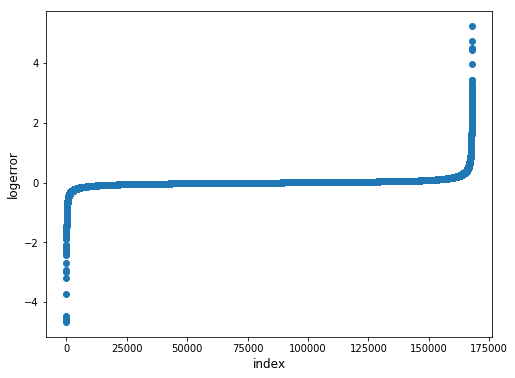

In [13]:
plt.figure(figsize=(8,6))
plt.scatter(range(train_201617.shape[0]), np.sort(train_201617.logerror.values))
plt.xlabel('index', fontsize=12)
plt.ylabel('logerror', fontsize=12)
plt.show()

Since there are some outliers, let's remove them and use histogram to plot the variable again

In [14]:
pd.options.mode.chained_assignment = None 

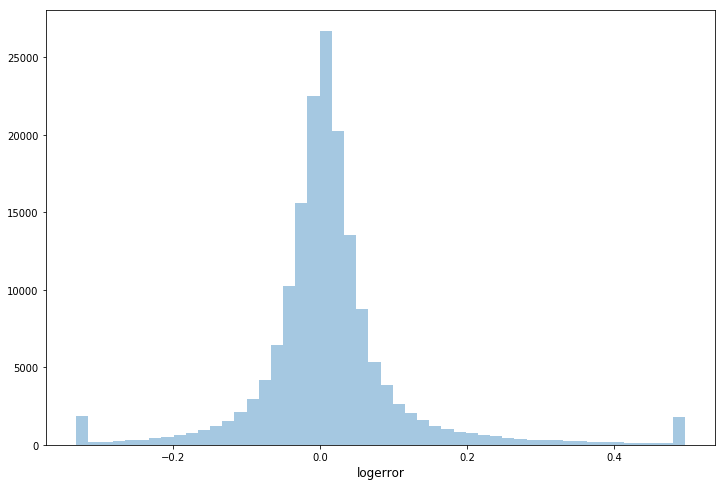

In [15]:
ulimit = np.percentile(train_201617.logerror.values, 99)
llimit = np.percentile(train_201617.logerror.values, 1)
train_201617['logerror'].loc[train_201617['logerror']>ulimit] = ulimit
train_201617['logerror'].loc[train_201617['logerror']<llimit] = llimit

plt.figure(figsize=(12,8))
sns.distplot(train_201617.logerror.values, bins=50, kde=False)
plt.xlabel('logerror', fontsize=12)
plt.show()

It is a beautiful normal distribution :)

Let's plot the last columns 'transactiondate' by each month using histogram.

In [16]:
train_201617['transactiondate'] = pd.to_datetime(train_201617['transactiondate'])

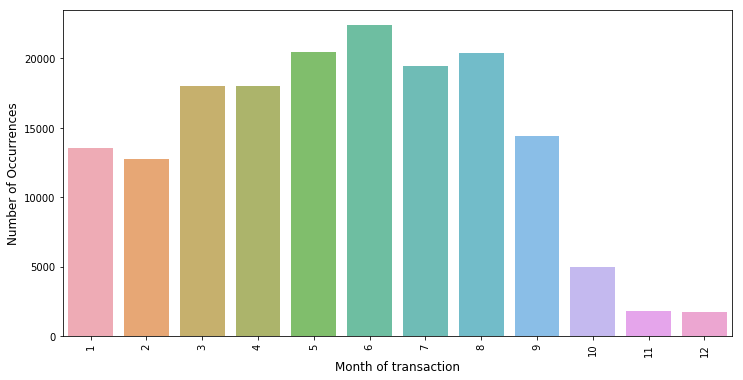

In [17]:
train_201617['transaction_month'] = train_201617['transactiondate'].dt.month

cnt_srs = train_201617['transaction_month'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8)
plt.xticks(rotation='vertical')
plt.xlabel('Month of transaction', fontsize=12)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.show()

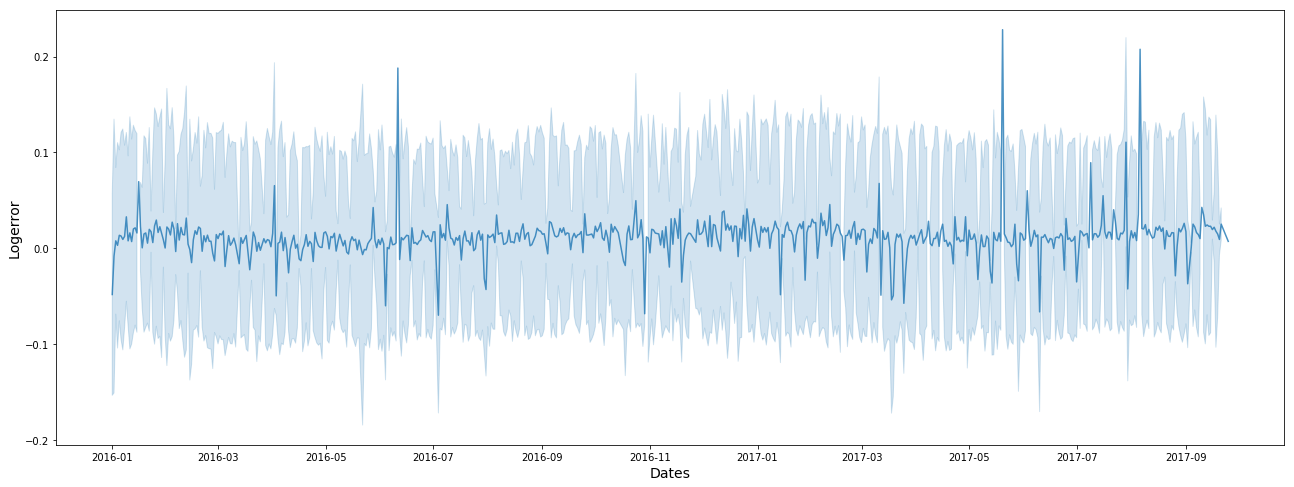

In [18]:
plt.figure(figsize=(22,8))
sns.lineplot(x = train_201617['transactiondate'], y = train_201617['logerror'], data = train_201617,
             ci = 'sd',alpha=0.8)
plt.xlabel('Dates', fontsize=14)
plt.ylabel('Logerror', fontsize=14)
plt.show()

We saw that the logerror is normally distributed, so we of course expect the white noise. 

Since Zillow mentioned there might be some properties sold multiple times within a month, so it is necessary to see the valuescounts for the parcelid

In [19]:
(train_201617['parcelid'].value_counts().reset_index())['parcelid'].value_counts()

1    162541
2      2660
3         9
Name: parcelid, dtype: int64

It's only 2669, not a big deal.

## Data Exploration on Properties features

We saw there are many missing values in the dataframe. So let's find out their filling rate.

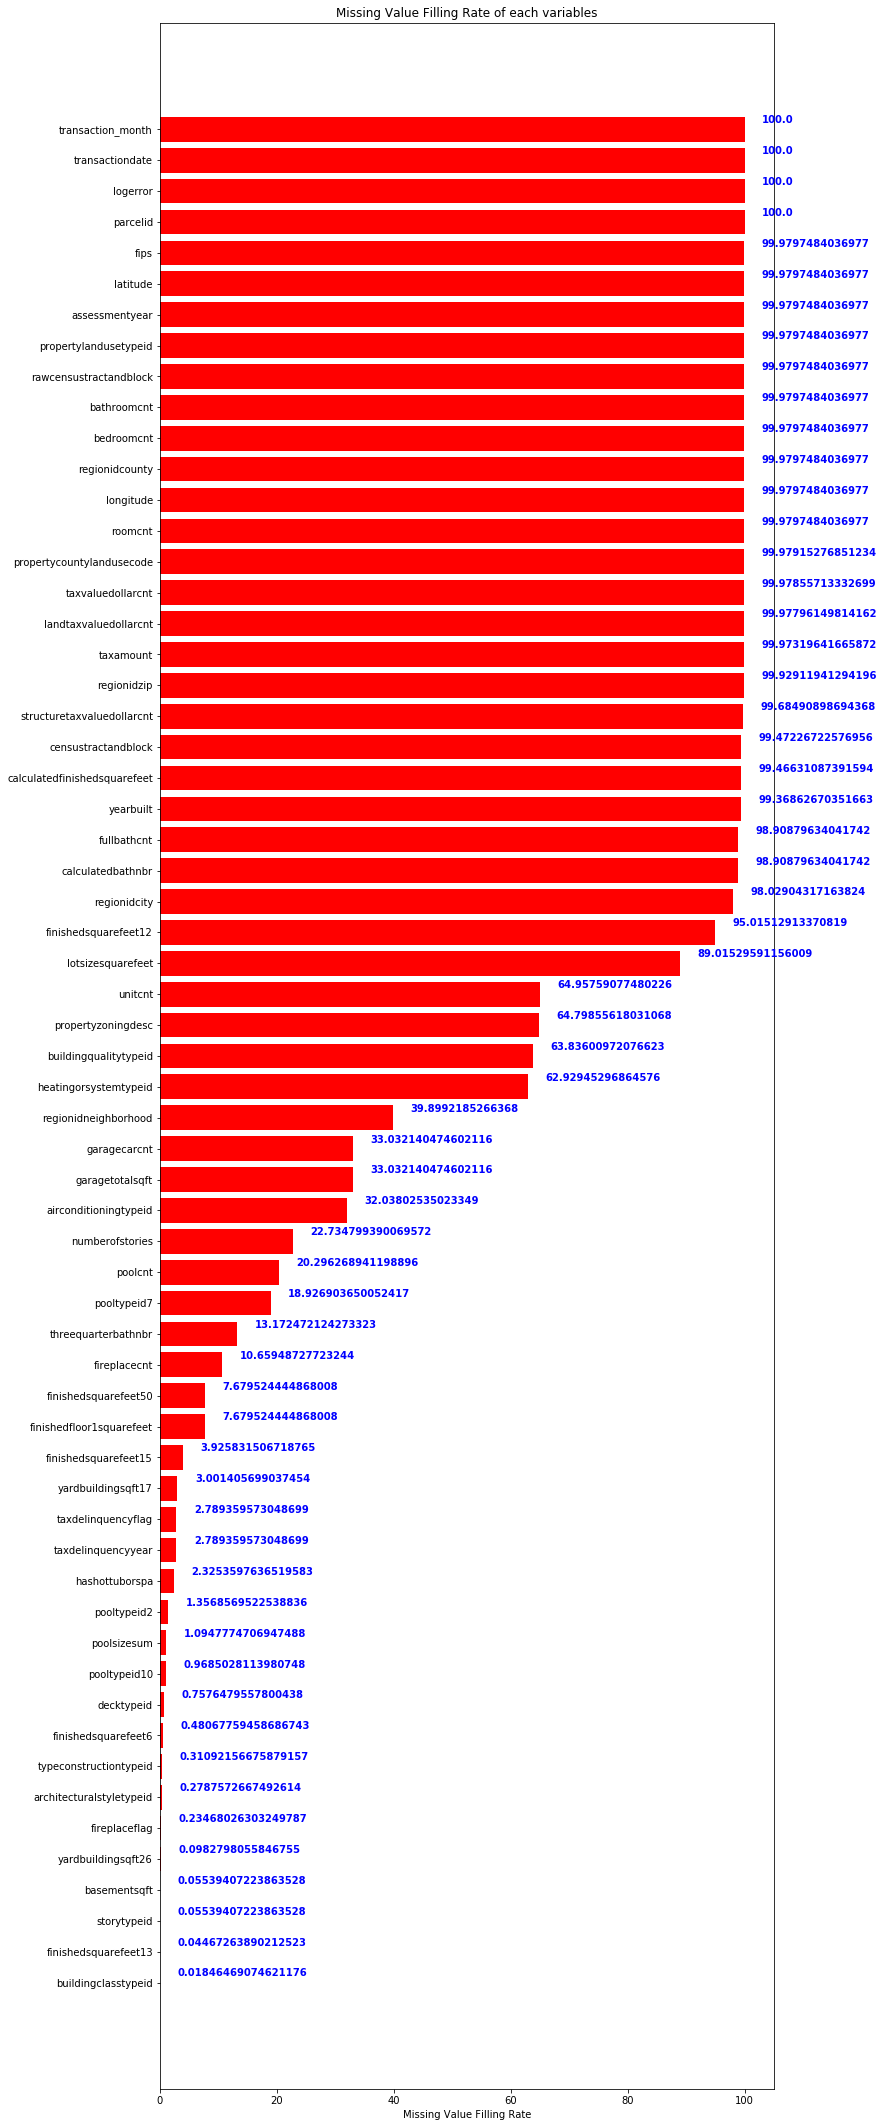

In [20]:
#Checking how many nan values are there for each column
missing_df = train_201617.isnull().sum(axis=0).reset_index()
missing_df.columns = ['variable', 'missing_values']
missing_df['filling_factor']=(train_201617.shape[0]-missing_df['missing_values'])/train_201617.shape[0]*100
missing_df= missing_df.sort_values('filling_factor').reset_index(drop = True)

indi = np.arange(len(missing_df['variable']))
width = 0.8
fig, ax = plt.subplots(figsize=(11,38))
rects = ax.barh(indi, np.array(missing_df.filling_factor.values), color='r')
for i, v in enumerate(missing_df['filling_factor']):
    ax.text(v + 3, i + 0.2, str(v), color='blue', fontweight='bold')
ax.set_yticks(indi)
ax.set_yticklabels(missing_df.variable.values, rotation='horizontal')
ax.set_xlabel("Missing Value Filling Rate")
ax.set_title("Missing Value Filling Rate of each variables")
plt.show()

Check out the datatypes

In [21]:
pd.options.display.max_rows = 62

dtype_df = train_201617.dtypes.reset_index()
dtype_df.columns = ["Count", "Column Type"]
dtype_df

Count     Column Type
0                       parcelid           int64
1                       logerror         float64
2                transactiondate  datetime64[ns]
3          airconditioningtypeid         float64
4       architecturalstyletypeid         float64
5                   basementsqft         float64
6                    bathroomcnt         float64
7                     bedroomcnt         float64
8            buildingclasstypeid         float64
9          buildingqualitytypeid         float64
10             calculatedbathnbr         float64
11                    decktypeid         float64
12      finishedfloor1squarefeet         float64
13  calculatedfinishedsquarefeet         float64
14          finishedsquarefeet12         float64
15          finishedsquarefeet13         float64
16          finishedsquarefeet15         float64
17          finishedsquarefeet50         float64
18           finishedsquarefeet6         float64
19                          fips         float64
20                  fireplacecnt         float64
21                   fullbathcnt         float64
22                  garagecarcnt         float64
23               garagetotalsqft         float64
24                hashottuborspa          object
25         heatingorsystemtypeid         float64
26                      latitude         float64
27                     longitude         float64
28             lotsizesquarefeet         float64
29                       poolcnt         float64
30                   poolsizesum         float64
31                  pooltypeid10         float64
32                   pooltypeid2         float64
33                   pooltypeid7         float64
34     propertycountylandusecode          object
35         propertylandusetypeid         float64
36            propertyzoningdesc          object
37        rawcensustractandblock         float64
38                  regionidcity         float64
39                regionidcounty         float64
40          regionidneighborhood         float64
41                   regionidzip         float64
42                       roomcnt         float64
43                   storytypeid         float64
44           threequarterbathnbr         float64
45        typeconstructiontypeid         float64
46                       unitcnt         float64
47            yardbuildingsqft17         float64
48            yardbuildingsqft26         float64
49                     yearbuilt         float64
50               numberofstories         float64
51                 fireplaceflag          object
52    structuretaxvaluedollarcnt         float64
53             taxvaluedollarcnt         float64
54                assessmentyear         float64
55         landtaxvaluedollarcnt         float64
56                     taxamount         float64
57            taxdelinquencyflag          object
58            taxdelinquencyyear         float64
59           censustractandblock         float64
60             transaction_month           int64

Now, let's find out how each variable correlate with our target value _Logerror_, but we need to drop all those non-numeric columns and columns that filling rate below 85%

In [22]:
filled_cols = missing_df[missing_df['filling_factor'] > 85]['variable']
filled_cols = list(filled_cols)
filled_cols

['lotsizesquarefeet',
 'finishedsquarefeet12',
 'regionidcity',
 'calculatedbathnbr',
 'fullbathcnt',
 'yearbuilt',
 'calculatedfinishedsquarefeet',
 'censustractandblock',
 'structuretaxvaluedollarcnt',
 'regionidzip',
 'taxamount',
 'landtaxvaluedollarcnt',
 'taxvaluedollarcnt',
 'propertycountylandusecode',
 'roomcnt',
 'longitude',
 'regionidcounty',
 'bedroomcnt',
 'bathroomcnt',
 'rawcensustractandblock',
 'propertylandusetypeid',
 'assessmentyear',
 'latitude',
 'fips',
 'parcelid',
 'logerror',
 'transactiondate',
 'transaction_month']

In [23]:
filled_data = train_201617[filled_cols]

In [24]:
filled_data.drop(['propertycountylandusecode','transactiondate'],axis = 1,inplace= True)

In [25]:
filled_data.columns

Index(['lotsizesquarefeet', 'finishedsquarefeet12', 'regionidcity',
       'calculatedbathnbr', 'fullbathcnt', 'yearbuilt',
       'calculatedfinishedsquarefeet', 'censustractandblock',
       'structuretaxvaluedollarcnt', 'regionidzip', 'taxamount',
       'landtaxvaluedollarcnt', 'taxvaluedollarcnt', 'roomcnt', 'longitude',
       'regionidcounty', 'bedroomcnt', 'bathroomcnt', 'rawcensustractandblock',
       'propertylandusetypeid', 'assessmentyear', 'latitude', 'fips',
       'parcelid', 'logerror', 'transaction_month'],
      dtype='object')

In [26]:
#Checking how many nan values are there for each column
filled_data_missing_factor = filled_data.isnull().sum(axis=0).reset_index()
filled_data_missing_factor.columns = ['variable', 'missing_values']
filled_data_missing_factor['filling_factor']=(filled_data.shape[0]-filled_data_missing_factor['missing_values'])/filled_data.shape[0]*100
filled_data_missing_factor= filled_data_missing_factor.sort_values('filling_factor').reset_index(drop = True)
filled_data_missing_factor

variable  missing_values  filling_factor
0              lotsizesquarefeet           18442       89.015296
1           finishedsquarefeet12            8369       95.015129
2                   regionidcity            3309       98.029043
3              calculatedbathnbr            1832       98.908796
4                    fullbathcnt            1832       98.908796
5                      yearbuilt            1060       99.368627
6   calculatedfinishedsquarefeet             896       99.466311
7            censustractandblock             886       99.472267
8     structuretaxvaluedollarcnt             529       99.684909
9                    regionidzip             119       99.929119
10                     taxamount              45       99.973196
11         landtaxvaluedollarcnt              37       99.977961
12             taxvaluedollarcnt              36       99.978557
13                       roomcnt              34       99.979748
14                     longitude              34       99.979748
15                regionidcounty              34       99.979748
16                    bedroomcnt              34       99.979748
17                   bathroomcnt              34       99.979748
18        rawcensustractandblock              34       99.979748
19         propertylandusetypeid              34       99.979748
20                assessmentyear              34       99.979748
21                      latitude              34       99.979748
22                          fips              34       99.979748
23                      parcelid               0      100.000000
24                      logerror               0      100.000000
25             transaction_month               0      100.000000

In [27]:
filled_data

lotsizesquarefeet  finishedsquarefeet12  regionidcity  \
0                  7528.0                1684.0       12447.0   
1                  3643.0                2263.0       32380.0   
2                 11423.0                2217.0       47019.0   
3                 70859.0                 839.0       12447.0   
4                  6000.0                2283.0       17686.0   
5                  2708.0                3067.0       29712.0   
6                  6677.0                1297.0       24174.0   
7                     NaN                1763.0       13150.0   
8                     NaN                 796.0       25459.0   
9                     NaN                1260.0       46098.0   
10                 8279.0                1417.0       12447.0   
11                 7052.0                3080.0       12447.0   
12                 8214.0                1484.0      396054.0   
13                    NaN                1249.0       52650.0   
14                 7626.0                1367.0       17150.0   
15                 6000.0                1302.0       25218.0   
16                 5662.0                1558.0       53655.0   
17               147471.0                 597.0       46298.0   
18                 7200.0                1321.0       34780.0   
19                 6171.0                1727.0       12447.0   
20                 4444.0                 840.0       46298.0   
21                 4275.0                1476.0       47568.0   
22                 6000.0                1430.0       24832.0   
23                10926.0                3749.0       12447.0   
24                 1665.0                1213.0       24832.0   
25                 8247.0                1875.0        5465.0   
26                 6676.0                1302.0       40227.0   
27                    NaN                1858.0       17686.0   
28                43599.0                1045.0       12447.0   
29                 8051.0                1329.0       46298.0   
30                 5633.0                1144.0       54311.0   
...                   ...                   ...           ...   
167857             3349.0                1368.0       33836.0   
167858             4500.0                 960.0       12447.0   
167859             8159.0                1160.0       12447.0   
167860             7495.0                1213.0       33612.0   
167861             3743.0                 832.0       21778.0   
167862             5834.0                1774.0       12447.0   
167863             7476.0                1580.0       20008.0   
167864             5717.0                 820.0       20008.0   
167865            39359.0                1070.0       33612.0   
167866            17881.0                3539.0        4406.0   
167867                NaN                5210.0       12447.0   
167868            22496.0                1258.0       33612.0   
167869             7984.0                 856.0       30267.0   
167870             6143.0                2166.0       33612.0   
167871             5632.0                1023.0       44116.0   
167872             5201.0                 892.0       12447.0   
167873            12000.0                1281.0       12447.0   
167874             4454.0                1472.0       12447.0   
167875            45398.0                 624.0        5534.0   
167876           107392.0                 868.0       12447.0   
167877             4995.0                 912.0       45457.0   
167878             7333.0                2068.0       20008.0   
167879             7503.0                2200.0       33612.0   
167880            57110.0                1261.0       12447.0   
167881             7499.0                1570.0       12447.0   
167882             4630.0                1633.0       30267.0   
167883            59487.0                1741.0       12447.0   
167884            47405.0                1286.0       12447.0   
167885            12105.0                16

In [28]:
#Fill all the missing values with mean values.
meanvalues = filled_data.mean(axis=0)
mean_filled_data = filled_data.fillna(meanvalues)

Let's see the corelation coefficient of our new pure numeric dataframe.

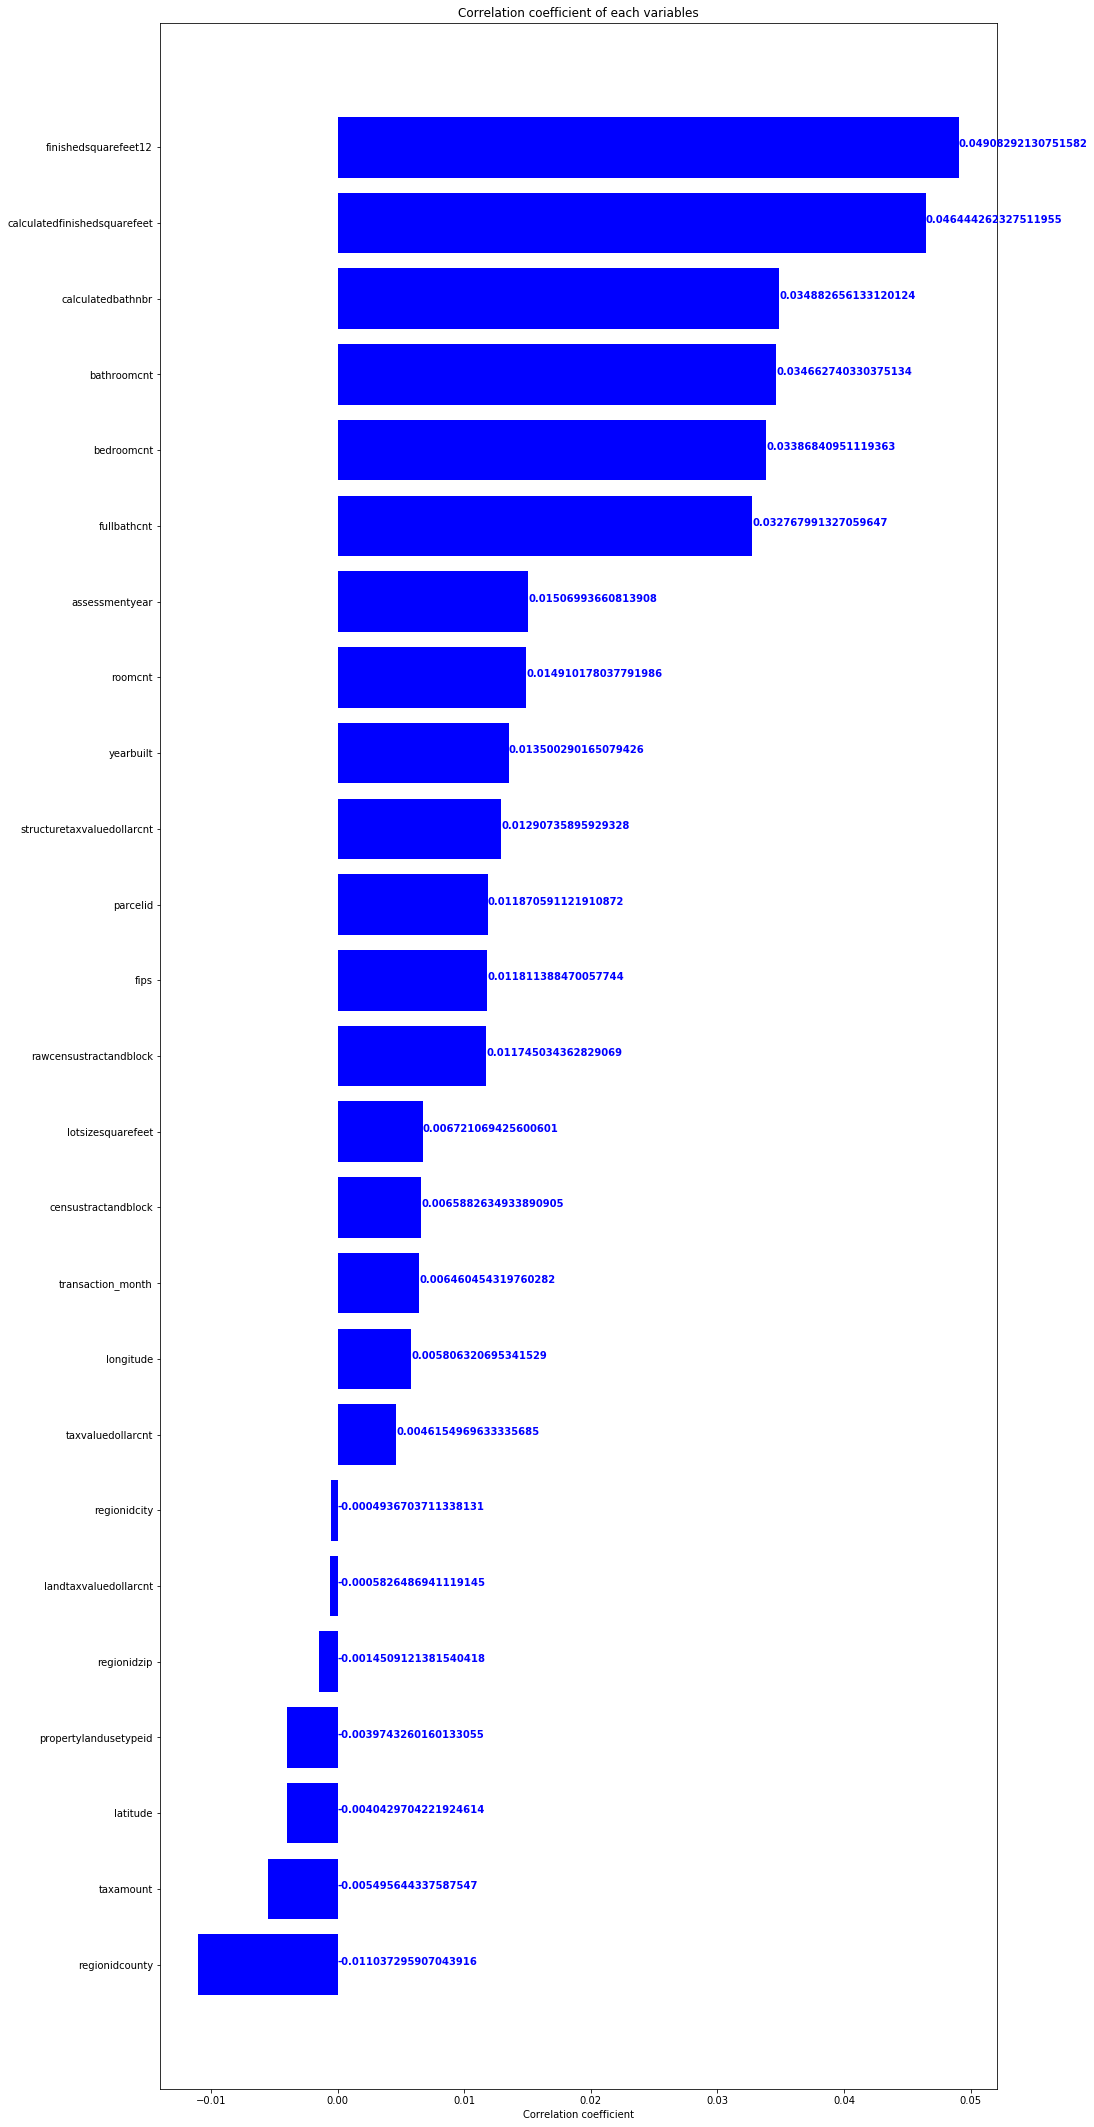

In [29]:
#Get all the columns names
colnames = [col for col in mean_filled_data.columns if col not in ['logerror']]

labels = []
values = []
for col in colnames:
    labels.append(col)
    values.append(np.corrcoef(mean_filled_data[col].values, mean_filled_data.logerror.values)[0,1])
corr_df = pd.DataFrame({'col_labels':labels, 'corr_values':values})
corr_df = corr_df.sort_values(by='corr_values')
corr_df = corr_df.fillna(0)

inde = np.arange(len(labels))
width = 0.8
fig, ax = plt.subplots(figsize=(15,38))
rects = ax.barh(inde, np.array(corr_df.corr_values.values), color='b')
for i, v in enumerate(corr_df['corr_values']):
    if v < 0:
        k  = 0
        ax.text(k,i,str(v), color='blue', fontweight='bold')
    else:
        ax.text(v,i,str(v), color='blue', fontweight='bold')
ax.set_yticks(inde)
ax.set_yticklabels(corr_df.col_labels.values, rotation='horizontal')
ax.set_xlabel("Correlation coefficient")
ax.set_title("Correlation coefficient of each variables")
plt.show()

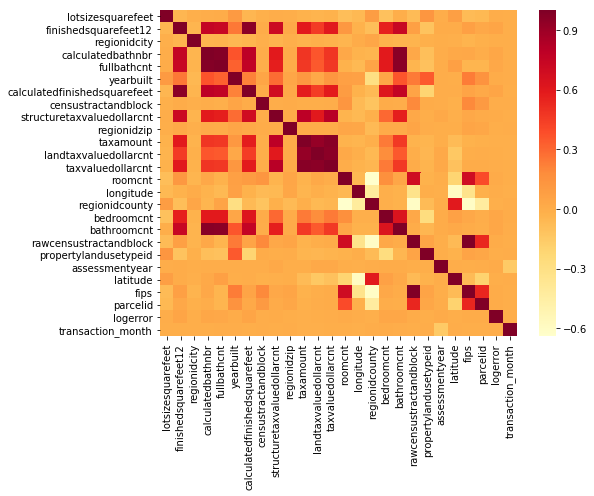

In [30]:
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(mean_filled_data.corr(),cmap = 'YlOrRd')
plt.show()

Almost all of them are correlated with each other, but some variables mean the same thing. So let's see how each of them varies with our target variable.Then it is necessary to see the heatmap of correlation between variables that doesn't have much missing values.

In [31]:
#Check to see what kind of numerical values are for each variable, so we can have wise choice 
#for each plot.
mean_filled_data['abs_logerror'] = mean_filled_data['logerror'].abs()
mean_filled_data.head()

lotsizesquarefeet  finishedsquarefeet12  regionidcity  calculatedbathnbr  \
0             7528.0                1684.0       12447.0                2.0   
1             3643.0                2263.0       32380.0                3.5   
2            11423.0                2217.0       47019.0                3.0   
3            70859.0                 839.0       12447.0                2.0   
4             6000.0                2283.0       17686.0                2.5   

   fullbathcnt  yearbuilt  calculatedfinishedsquarefeet  censustractandblock  \
0          2.0     1959.0                        1684.0         6.037107e+13   
1          3.0     2014.0                        2263.0         6.049390e+13   
2          3.0     1940.0                        2217.0         6.037464e+13   
3          2.0     1987.0                         839.0         6.037296e+13   
4          2.0     1981.0                        2283.0         6.059042e+13   

   structuretaxvaluedollarcnt  regionidzip      ...       bathroomcnt  \
0                    122754.0      96370.0      ...               2.0   
1                    346458.0      96962.0      ...               3.5   
2                     61994.0      96293.0      ...               3.0   
3                    171518.0      96222.0      ...               2.0   
4                    169574.0      96961.0      ...               2.5   

   rawcensustractandblock  propertylandusetypeid  assessmentyear    latitude  \
0            6.037107e+07                  261.0          2015.0  34280990.0   
1            6.059052e+07                  261.0          2015.0  33668120.0   
2            6.037464e+07                  261.0          2015.0  34136312.0   
3            6.037296e+07                  266.0          2015.0  33755800.0   
4            6.059042e+07                  261.0          2015.0  33485643.0   

     fips  parcelid  logerror  transaction_month  abs_logerror  
0  6037.0  11016594    0.0276                  1        0.0276  
1  6059.0  14366692   -0.1684                  1        0.1684  
2  6037.0  12098116   -0.0040                  1        0.0040  
3  6037.0  12643413    0.0218                  1        0.0218  
4  6059.0  14432541   -0.0050                  1        0.0050  

[5 rows x 27 columns]

In [32]:
mean_filled_data.columns

Index(['lotsizesquarefeet', 'finishedsquarefeet12', 'regionidcity',
       'calculatedbathnbr', 'fullbathcnt', 'yearbuilt',
       'calculatedfinishedsquarefeet', 'censustractandblock',
       'structuretaxvaluedollarcnt', 'regionidzip', 'taxamount',
       'landtaxvaluedollarcnt', 'taxvaluedollarcnt', 'roomcnt', 'longitude',
       'regionidcounty', 'bedroomcnt', 'bathroomcnt', 'rawcensustractandblock',
       'propertylandusetypeid', 'assessmentyear', 'latitude', 'fips',
       'parcelid', 'logerror', 'transaction_month', 'abs_logerror'],
      dtype='object')

In [33]:
mean_filled_data.dtypes

lotsizesquarefeet               float64
finishedsquarefeet12            float64
regionidcity                    float64
calculatedbathnbr               float64
fullbathcnt                     float64
yearbuilt                       float64
calculatedfinishedsquarefeet    float64
censustractandblock             float64
structuretaxvaluedollarcnt      float64
regionidzip                     float64
taxamount                       float64
landtaxvaluedollarcnt           float64
taxvaluedollarcnt               float64
roomcnt                         float64
longitude                       float64
regionidcounty                  float64
bedroomcnt                      float64
bathroomcnt                     float64
rawcensustractandblock          float64
propertylandusetypeid           float64
assessmentyear                  float64
latitude                        float64
fips                            float64
parcelid                          int64
logerror                        float64


Creating extra columns to separate our data into 3 groups based on error level. top 25%, mid 50%, and bottom 25%. And one extra feature to show that whether Zestimate over or under predict the price.

In [34]:
mean_filled_data['abs_logerror'].describe()

count    167888.000000
mean          0.060928
std           0.083415
min           0.000000
25%           0.013900
50%           0.032500
75%           0.069097
max           0.495900
Name: abs_logerror, dtype: float64

In [35]:
error_type = lambda x:(('good','normal')[x > 0.013900],'worst')[x > 0.069097]
mean_filled_data['error_level'] = mean_filled_data['abs_logerror'].apply(error_type)
mean_filled_data['under_over_predict'] = np.where(mean_filled_data['logerror'] > 0, 'overpredict','underpredict')

In [36]:
mean_filled_data.head()

lotsizesquarefeet  finishedsquarefeet12  regionidcity  calculatedbathnbr  \
0             7528.0                1684.0       12447.0                2.0   
1             3643.0                2263.0       32380.0                3.5   
2            11423.0                2217.0       47019.0                3.0   
3            70859.0                 839.0       12447.0                2.0   
4             6000.0                2283.0       17686.0                2.5   

   fullbathcnt  yearbuilt  calculatedfinishedsquarefeet  censustractandblock  \
0          2.0     1959.0                        1684.0         6.037107e+13   
1          3.0     2014.0                        2263.0         6.049390e+13   
2          3.0     1940.0                        2217.0         6.037464e+13   
3          2.0     1987.0                         839.0         6.037296e+13   
4          2.0     1981.0                        2283.0         6.059042e+13   

   structuretaxvaluedollarcnt  regionidzip         ...          \
0                    122754.0      96370.0         ...           
1                    346458.0      96962.0         ...           
2                     61994.0      96293.0         ...           
3                    171518.0      96222.0         ...           
4                    169574.0      96961.0         ...           

   propertylandusetypeid  assessmentyear    latitude    fips  parcelid  \
0                  261.0          2015.0  34280990.0  6037.0  11016594   
1                  261.0          2015.0  33668120.0  6059.0  14366692   
2                  261.0          2015.0  34136312.0  6037.0  12098116   
3                  266.0          2015.0  33755800.0  6037.0  12643413   
4                  261.0          2015.0  33485643.0  6059.0  14432541   

   logerror  transaction_month  abs_logerror  error_level  under_over_predict  
0    0.0276                  1        0.0276       normal         overpredict  
1   -0.1684                  1        0.1684        worst        underpredict  
2   -0.0040                  1        0.0040         good        underpredict  
3    0.0218                  1        0.0218       normal         overpredict  
4   -0.0050                  1        0.0050         good        underpredict  

[5 rows x 29 columns]

# 2. Single variable analysis

####  1. lotsizesquarefeet vs Absolute Logerror

In [37]:
lot_size = mean_filled_data[mean_filled_data['lotsizesquarefeet'] < 2100000]

<Figure size 432x432 with 0 Axes>

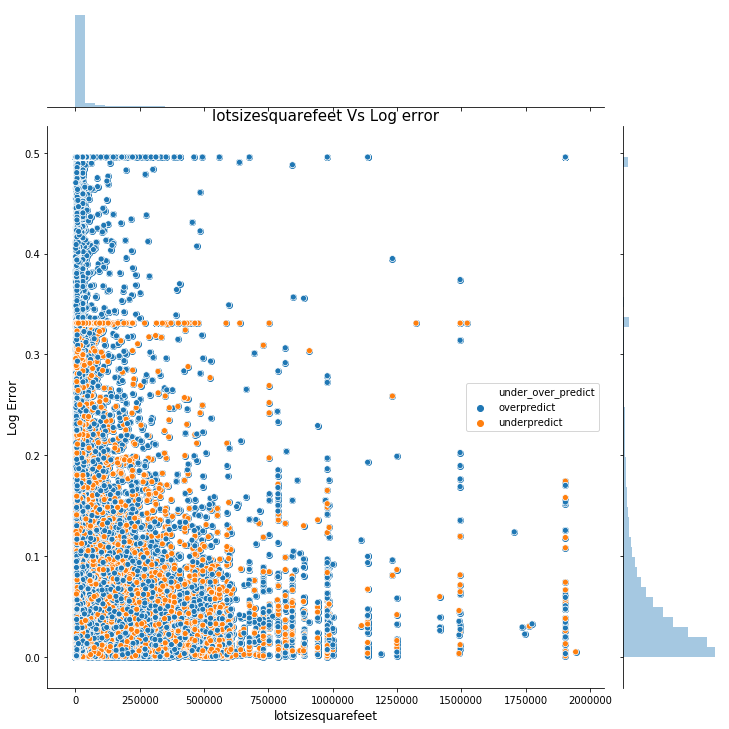

In [38]:
plt.figure(figsize=(6,6))
sns.jointplot(x=lot_size.lotsizesquarefeet.values, y=lot_size.abs_logerror.values, height=10).plot_joint(sns.scatterplot,hue = lot_size.under_over_predict)
plt.ylabel('Log Error', fontsize=12)
plt.xlabel('lotsizesquarefeet', fontsize=12)
plt.title("lotsizesquarefeet Vs Log error", fontsize=15)
plt.show()

#### 2. finishedsquarefeet12 vs Logerror

In [39]:
finishedsquarefeet = mean_filled_data[mean_filled_data['finishedsquarefeet12'] < 10000]

<Figure size 2160x1080 with 0 Axes>

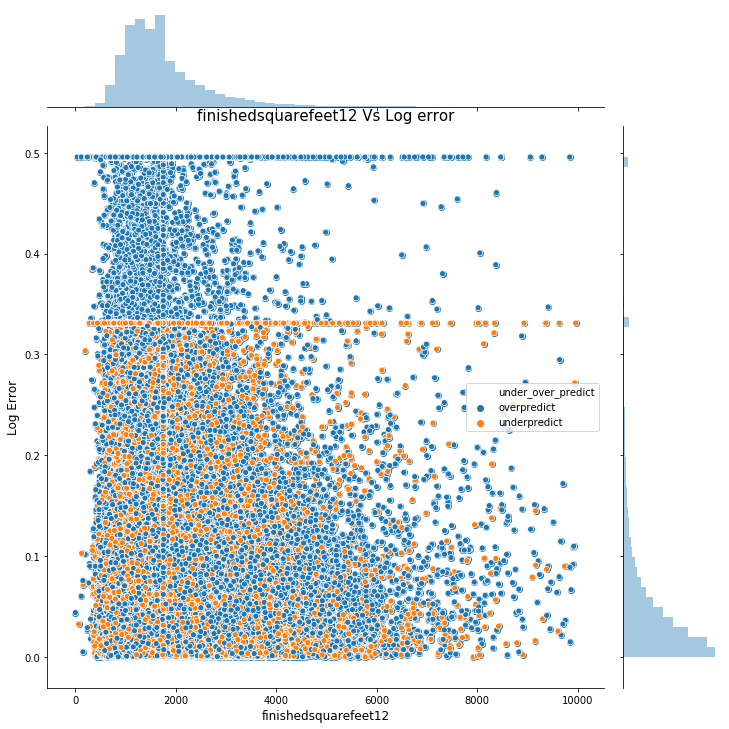

In [40]:
plt.figure(figsize=(30,15))
sns.jointplot(x=finishedsquarefeet.finishedsquarefeet12.values, y=finishedsquarefeet.abs_logerror.values, height=10).plot_joint(sns.scatterplot,hue = finishedsquarefeet.under_over_predict)
#ax.set_xticklabels(corr_var.regionidcounty.values, rotation='vertical')
plt.ylabel('Log Error', fontsize=12)
plt.xlabel('finishedsquarefeet12', fontsize=12)
plt.title("finishedsquarefeet12 Vs Log error", fontsize=15)
plt.show()

#### 3. regionidcity

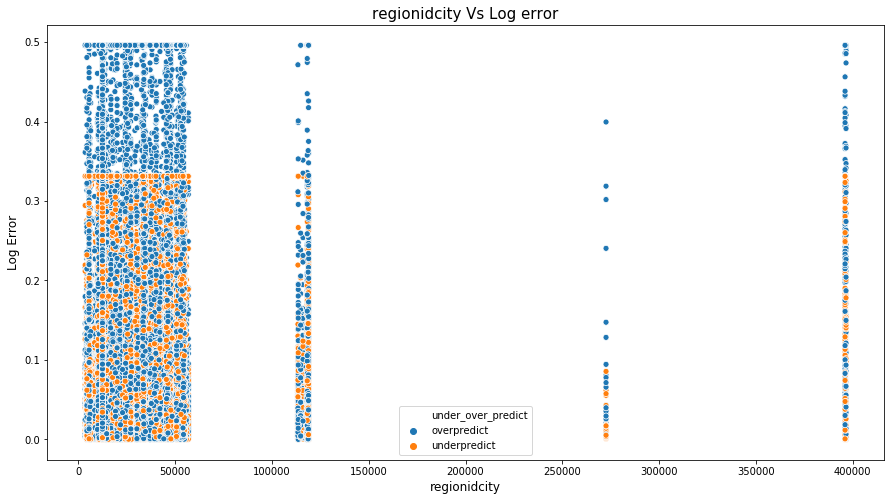

In [41]:
plt.figure(figsize=(15,8))
sns.scatterplot(x=mean_filled_data.regionidcity.values, y=mean_filled_data.abs_logerror.values,hue = mean_filled_data.under_over_predict)
plt.ylabel('Log Error', fontsize=12)
plt.xlabel('regionidcity', fontsize=12)
plt.title("regionidcity Vs Log error", fontsize=15)
plt.show()

#### 4. regionidcounty vs abs_logerror

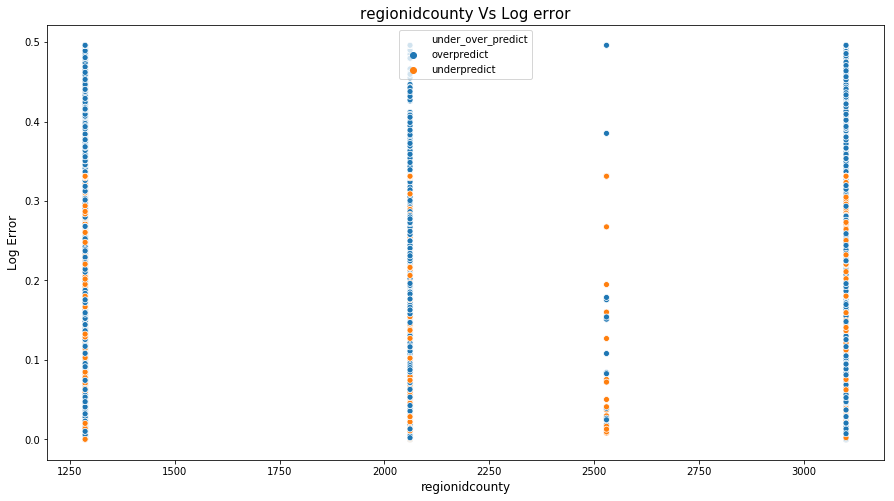

In [42]:
plt.figure(figsize=(15,8))
sns.scatterplot(x=mean_filled_data.regionidcounty.values, y=mean_filled_data.abs_logerror.values,hue = mean_filled_data.under_over_predict)
plt.ylabel('Log Error', fontsize=12)
plt.xlabel('regionidcounty', fontsize=12)
plt.title("regionidcounty Vs Log error", fontsize=15)
plt.show()

#### 5. fips vs abs_logerror

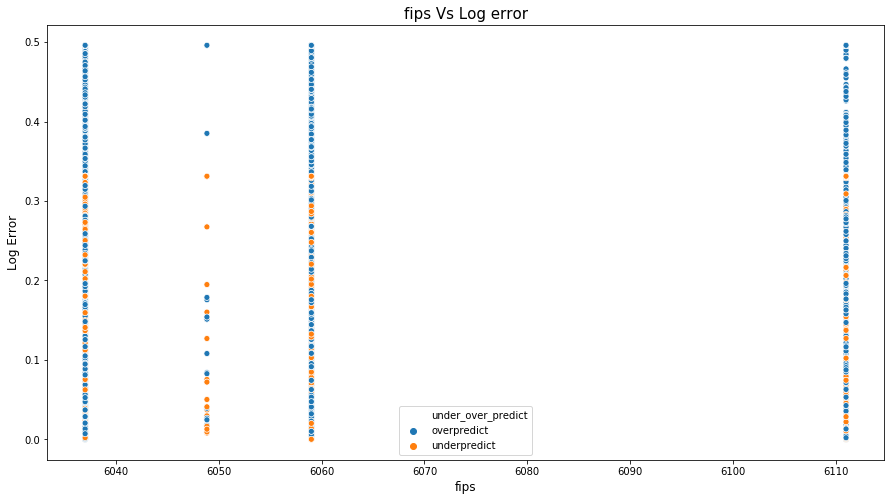

In [43]:
plt.figure(figsize=(15,8))
sns.scatterplot(x=mean_filled_data.fips.values, y=mean_filled_data.abs_logerror.values, hue = mean_filled_data.under_over_predict)
plt.ylabel('Log Error', fontsize=12)
plt.xlabel('fips', fontsize=12)
plt.title("fips Vs Log error", fontsize=15)
plt.show()

<Figure size 864x576 with 0 Axes>

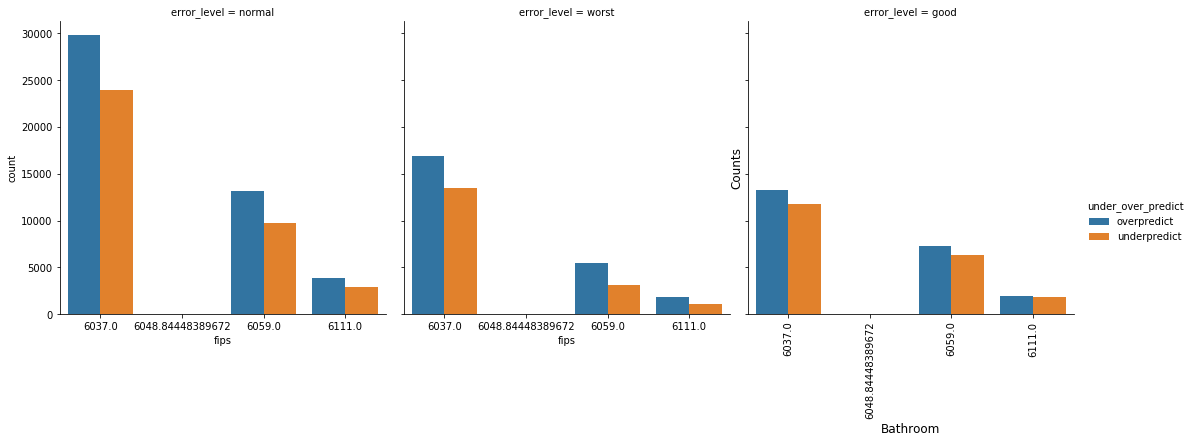

In [44]:
plt.figure(figsize=(12,8))
sns.catplot(x="fips",col ='error_level',hue ='under_over_predict',kind = 'count',data=mean_filled_data)
plt.ylabel('Counts', fontsize=12)
plt.xlabel('Bathroom', fontsize=12)
plt.xticks(rotation='vertical')
#plt.title("Frequency of Bathroom count", fontsize=15)
plt.show()

#### 6. calculatedbathnbr vs logerror

<Figure size 864x576 with 0 Axes>

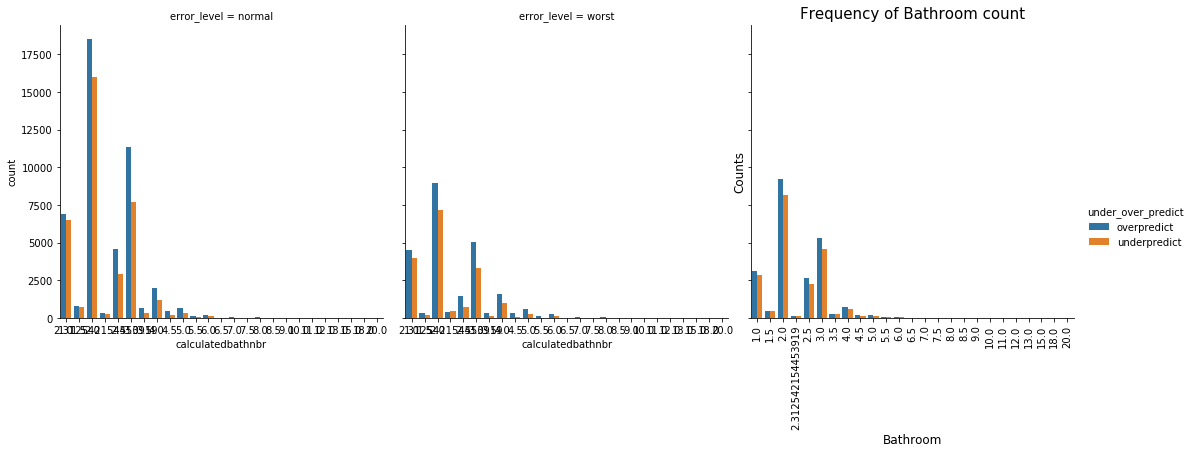

In [45]:
plt.figure(figsize=(12,8))
sns.catplot(x="calculatedbathnbr",col ='error_level',hue ='under_over_predict',kind = 'count',data=mean_filled_data)
#sns.countplot(x="calculatedbathnbr",hue ='under_over_predict',data=mean_filled_data)
plt.ylabel('Counts', fontsize=12)
plt.xlabel('Bathroom', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of Bathroom count", fontsize=15)
plt.show()

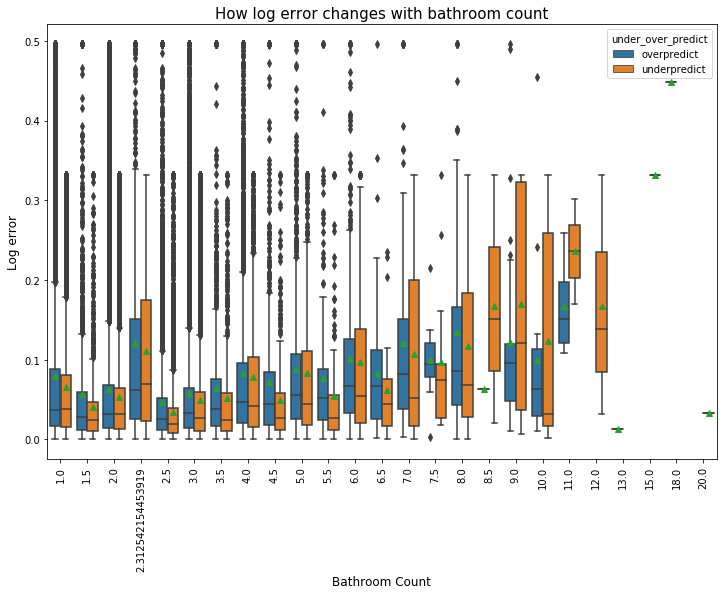

In [46]:
plt.figure(figsize=(12,8))
sns.boxplot(x="calculatedbathnbr", y="abs_logerror", hue = 'under_over_predict',data=mean_filled_data,showmeans= True)
plt.ylabel('Log error', fontsize=12)
plt.xlabel('Bathroom Count', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("How log error changes with bathroom count", fontsize=15)
plt.show()

#### 7. bathroomcnt vs abs_logerror

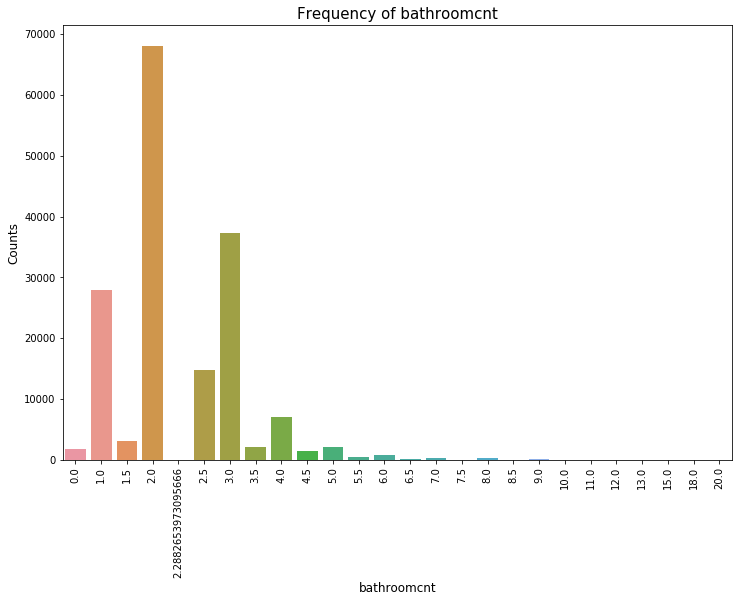

In [47]:
plt.figure(figsize=(12,8))
sns.countplot(x="bathroomcnt", data=mean_filled_data)
plt.ylabel('Counts', fontsize=12)
plt.xlabel('bathroomcnt', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of bathroomcnt", fontsize=15)
plt.show()

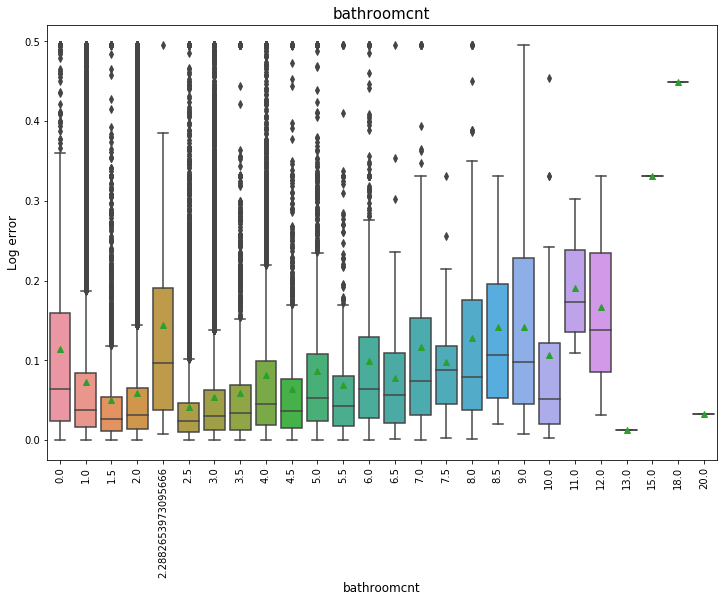

In [48]:
plt.figure(figsize=(12,8))
sns.boxplot(x="bathroomcnt", y="abs_logerror", data=mean_filled_data,showmeans= True)
plt.ylabel('Log error', fontsize=12)
plt.xlabel('bathroomcnt', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("bathroomcnt", fontsize=15)
plt.show()

#### 8. fullbathcnt vs logerror

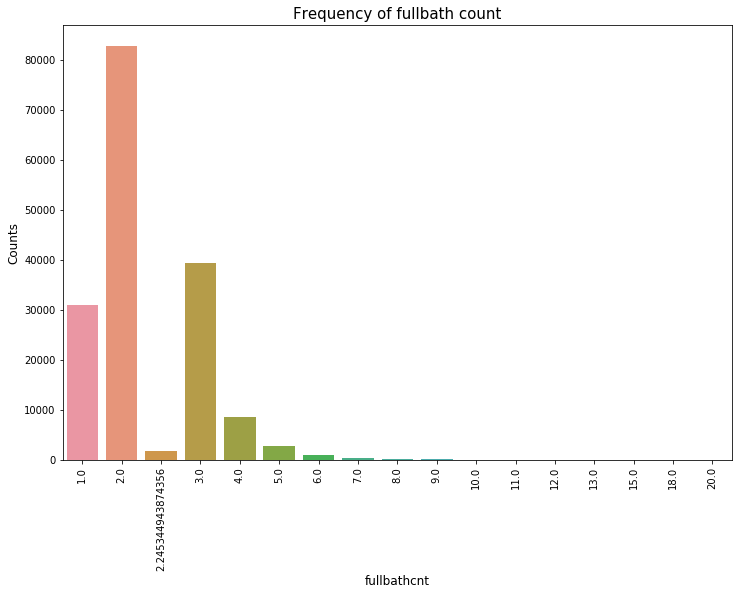

In [49]:
plt.figure(figsize=(12,8))
sns.countplot(x="fullbathcnt", data=mean_filled_data)
plt.ylabel('Counts', fontsize=12)
plt.xlabel('fullbathcnt', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of fullbath count", fontsize=15)
plt.show()

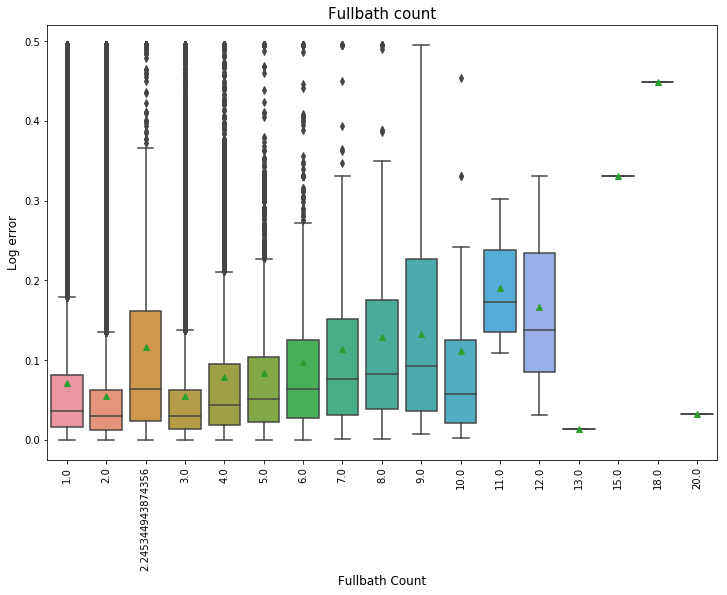

In [50]:
plt.figure(figsize=(12,8))
sns.boxplot(x="fullbathcnt", y="abs_logerror", data=mean_filled_data,showmeans= True)
plt.ylabel('Log error', fontsize=12)
plt.xlabel('Fullbath Count', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Fullbath count", fontsize=15)
plt.show()

#### 9. yearbuilt vs abs_logerror

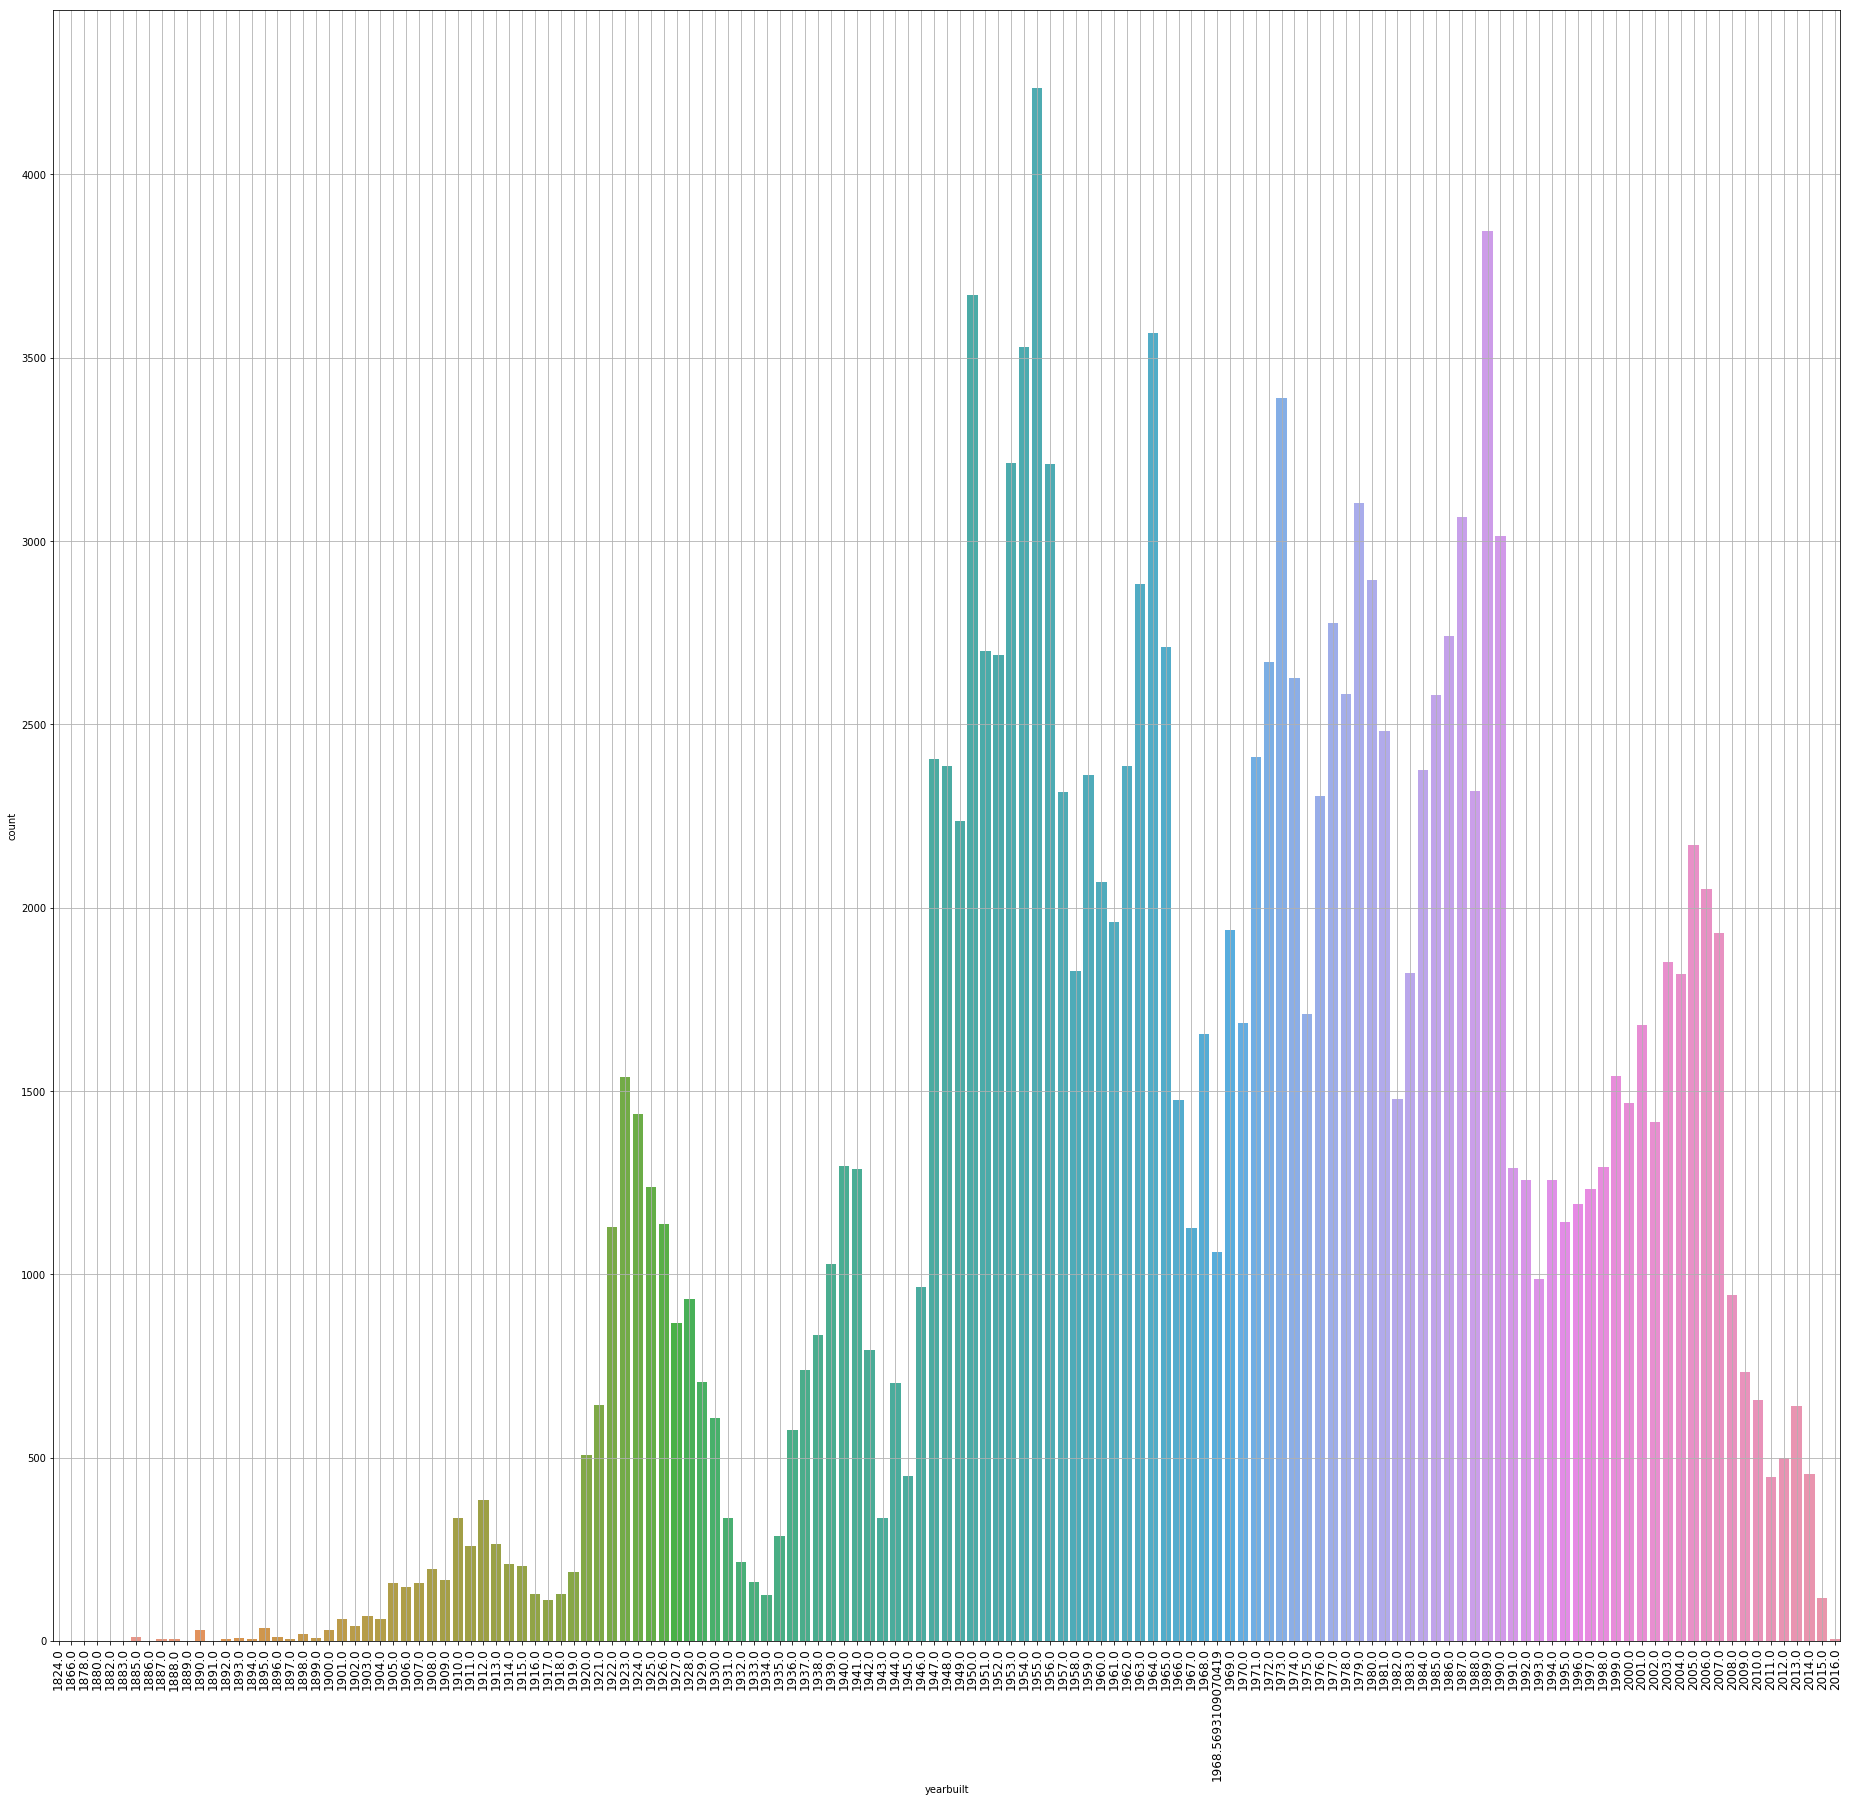

In [51]:
plt.figure(figsize=(15,30))
sns.countplot(x="yearbuilt", data=mean_filled_data)
N = len(list(mean_filled_data['yearbuilt'].unique()))

plt.xticks(range(N),rotation='vertical',fontsize = 12) # add loads of ticks
plt.grid()

plt.gca().margins(x=0)
plt.gcf().canvas.draw()
tl = plt.gca().get_xticklabels()
maxsize = max([t.get_window_extent().width for t in tl])
m = 0.2 # inch margin
s = maxsize/plt.gcf().dpi*N+2*m
margin = m/plt.gcf().get_size_inches()[0]

plt.gcf().subplots_adjust(left=margin, right=1.-margin)
plt.gcf().set_size_inches(s, plt.gcf().get_size_inches()[1])

plt.show()

In [52]:
yearbuiltrange = mean_filled_data[mean_filled_data['yearbuilt'] > 1875]

<Figure size 1800x1080 with 0 Axes>

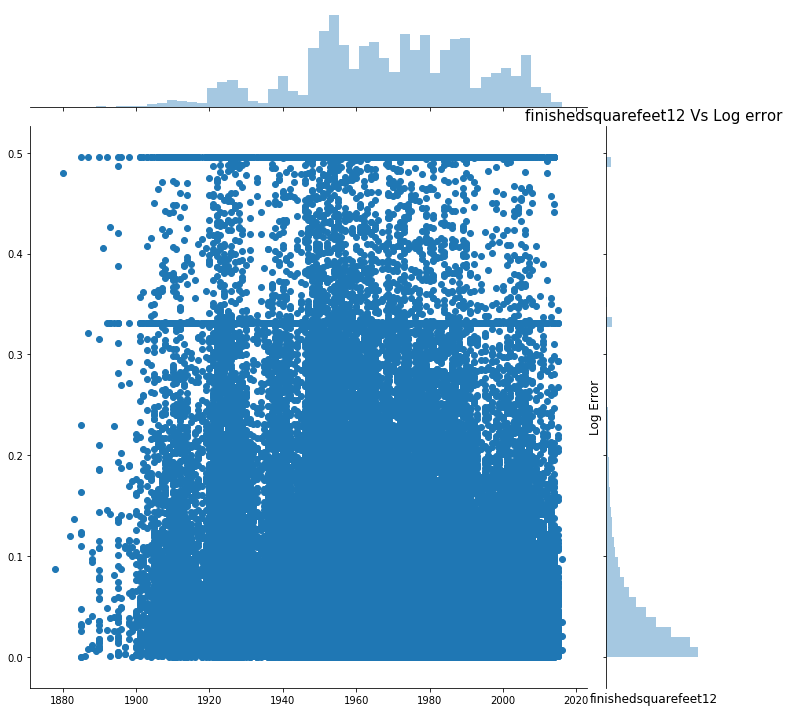

In [53]:
plt.figure(figsize=(25,15))
sns.jointplot(x=yearbuiltrange.yearbuilt.values, y=yearbuiltrange.abs_logerror.values, height=10)
#ax.set_xticklabels(corr_var.regionidcounty.values, rotation='vertical')
plt.ylabel('Log Error', fontsize=12)
plt.xlabel('finishedsquarefeet12', fontsize=12)
plt.title("finishedsquarefeet12 Vs Log error", fontsize=15)
plt.show()

#### 10. assessmentyear vs abs_logerror

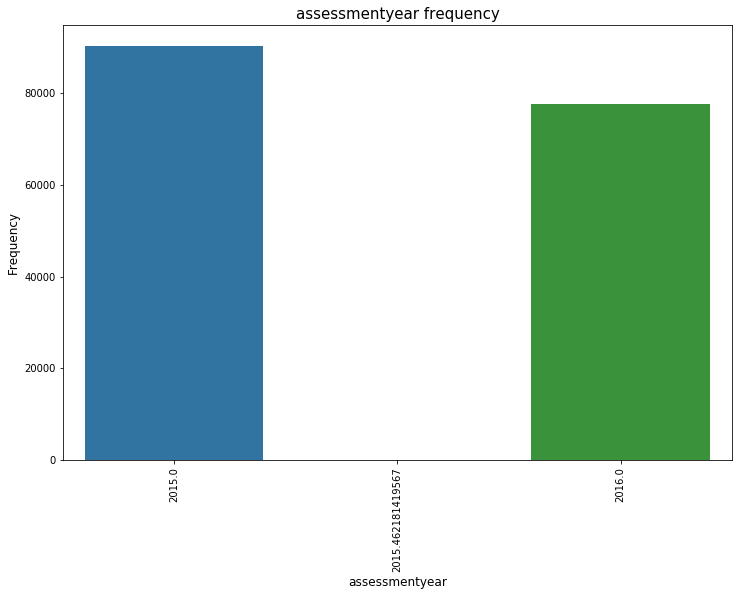

In [54]:
plt.figure(figsize=(12,8))
sns.countplot(x="assessmentyear", data=mean_filled_data)
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('assessmentyear', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("assessmentyear frequency", fontsize=15)
plt.show()

#### 11. calculatedfinishedsquarefeet vs logerror

In [55]:
calfinsqrft = mean_filled_data[mean_filled_data['calculatedfinishedsquarefeet'] < 9000]

<Figure size 432x432 with 0 Axes>

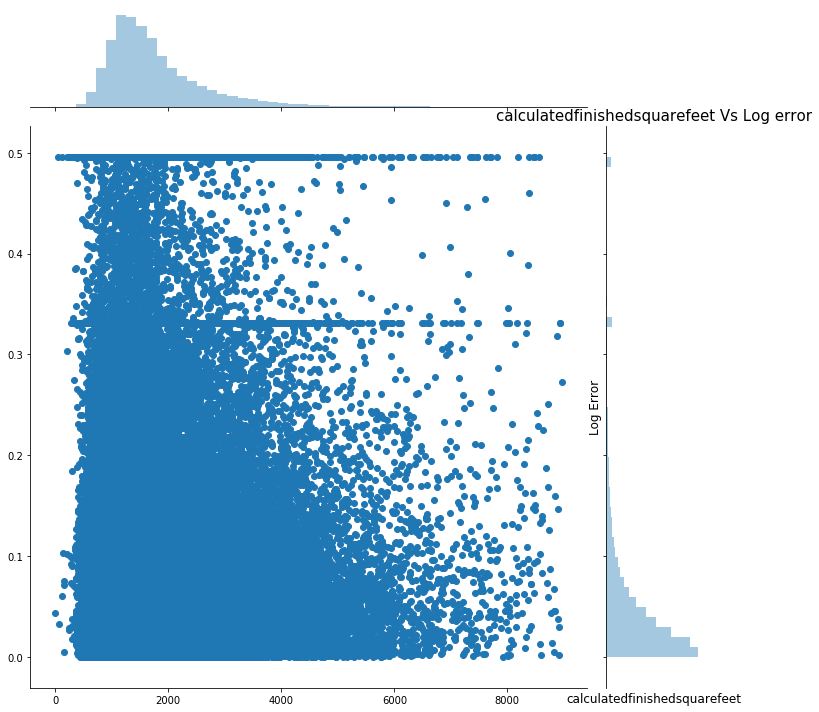

In [56]:
plt.figure(figsize=(6,6))
sns.jointplot(x=calfinsqrft.calculatedfinishedsquarefeet.values, y=calfinsqrft.abs_logerror.values, height=10)
plt.ylabel('Log Error', fontsize=12)
plt.xlabel('calculatedfinishedsquarefeet', fontsize=12)
plt.title("calculatedfinishedsquarefeet Vs Log error", fontsize=15)
plt.show()

#### 12. censustractandblock vs abs_logerror

In [57]:
ctrtandblc = mean_filled_data[mean_filled_data['censustractandblock']<10**14]

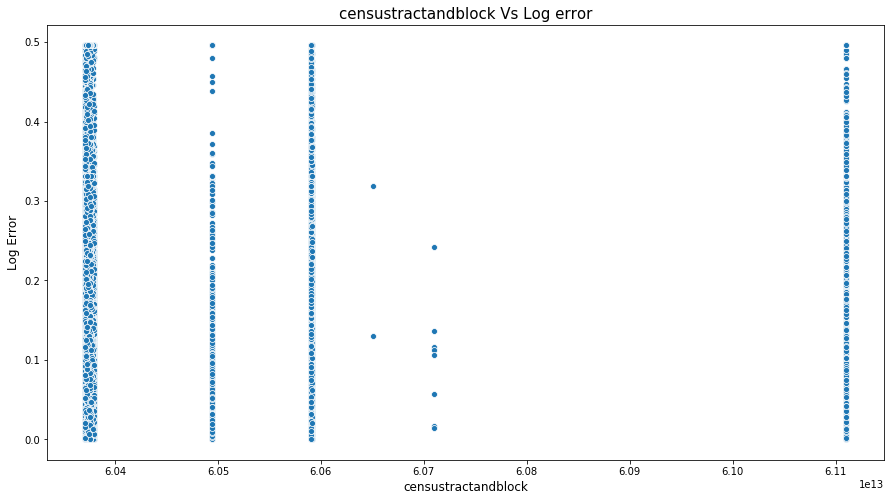

In [58]:
plt.figure(figsize=(15,8))
sns.scatterplot(x=ctrtandblc.censustractandblock.values, y=ctrtandblc.abs_logerror.values)
plt.ylabel('Log Error', fontsize=12)
plt.xlabel('censustractandblock', fontsize=12)
plt.title("censustractandblock Vs Log error", fontsize=15)
plt.show()

#### 13. rawcensustractandblock vs abs_logerror

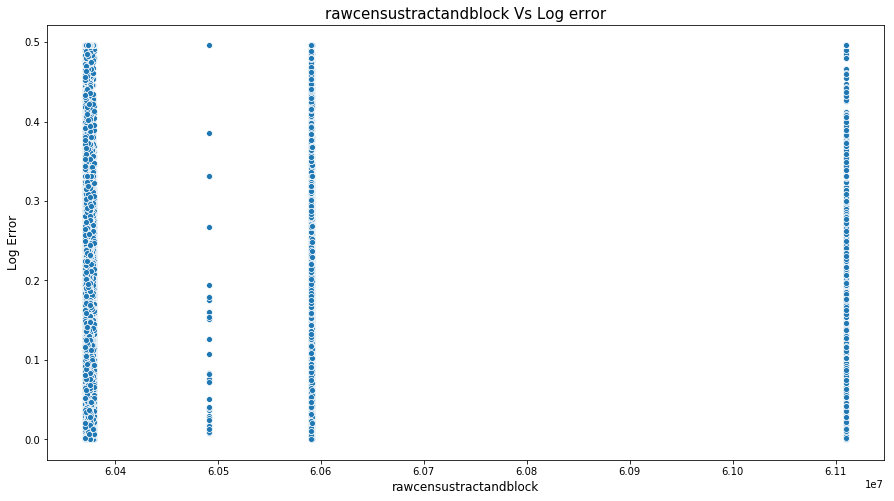

In [59]:
plt.figure(figsize=(15,8))
sns.scatterplot(x=mean_filled_data.rawcensustractandblock.values, y=mean_filled_data.abs_logerror.values)
plt.ylabel('Log Error', fontsize=12)
plt.xlabel('rawcensustractandblock', fontsize=12)
plt.title("rawcensustractandblock Vs Log error", fontsize=15)
plt.show()

#### 14.structuretaxvaluedollarcnt vs abs_logerror

In [60]:
strtaxdollr = mean_filled_data[mean_filled_data['structuretaxvaluedollarcnt']<(0.2*(10**7))]

<Figure size 432x432 with 0 Axes>

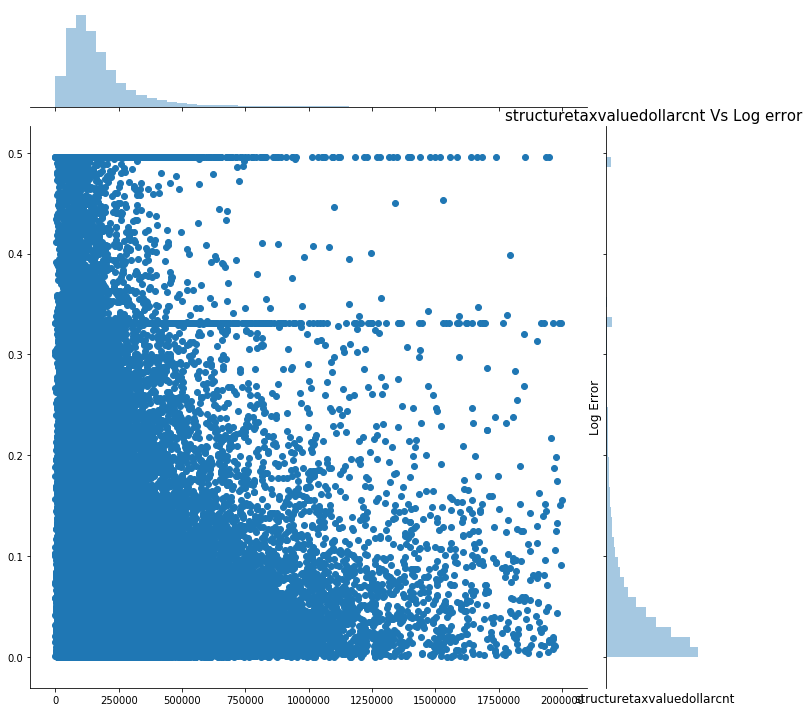

In [61]:
plt.figure(figsize=(6,6))
sns.jointplot(x=strtaxdollr.structuretaxvaluedollarcnt.values, y=strtaxdollr.abs_logerror.values, height=10)
plt.ylabel('Log Error', fontsize=12)
plt.xlabel('structuretaxvaluedollarcnt', fontsize=12)
plt.title("structuretaxvaluedollarcnt Vs Log error", fontsize=15)
plt.show()

#### 15. taxamount vs abs_logerror

In [62]:
taxamountdata = mean_filled_data[mean_filled_data['taxamount']<100000]

<Figure size 432x432 with 0 Axes>

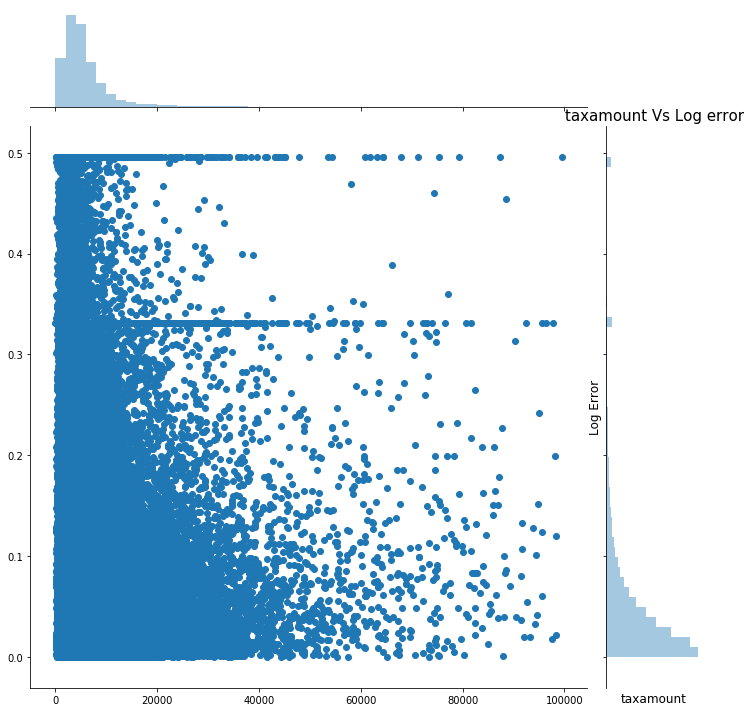

In [63]:
plt.figure(figsize=(6,6))
sns.jointplot(x=taxamountdata.taxamount.values, y=taxamountdata.abs_logerror.values, height=10)
plt.ylabel('Log Error', fontsize=12)
plt.xlabel('taxamount', fontsize=12)
plt.title("taxamount Vs Log error", fontsize=15)
plt.show()

#### 16. landtaxvaluedollarcnt vs abs_logerror

In [64]:
lndtaxdollr = mean_filled_data[mean_filled_data['landtaxvaluedollarcnt']<(0.4*(10**7))]

<Figure size 432x432 with 0 Axes>

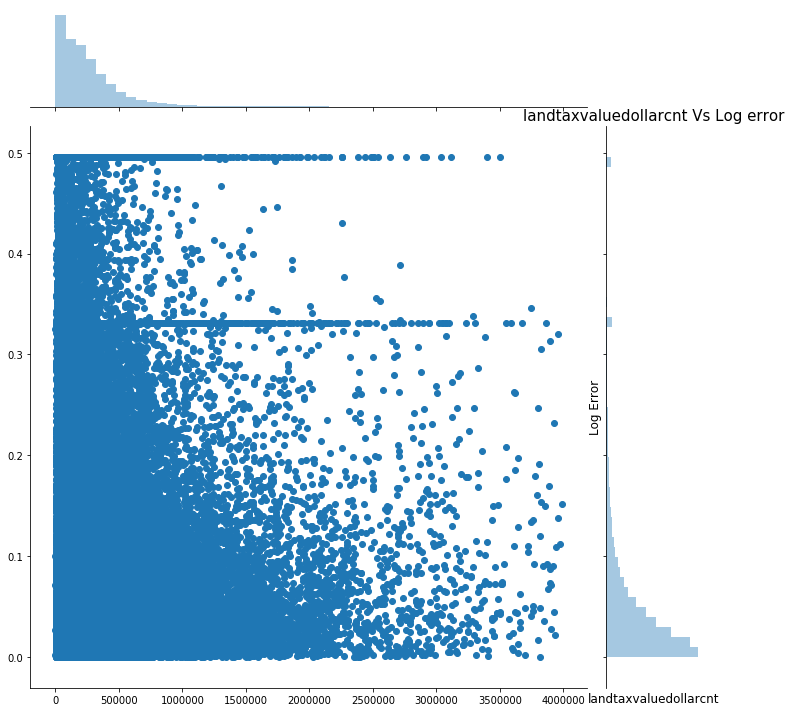

In [65]:
plt.figure(figsize=(6,6))
sns.jointplot(x=lndtaxdollr.landtaxvaluedollarcnt.values, y=lndtaxdollr.abs_logerror.values, height=10)
plt.ylabel('Log Error', fontsize=12)
plt.xlabel('landtaxvaluedollarcnt', fontsize=12)
plt.title("landtaxvaluedollarcnt Vs Log error", fontsize=15)
plt.show()

#### 17. taxvaluedollarcnt vs abs_logerror

In [66]:
taxdollr = mean_filled_data[mean_filled_data['taxvaluedollarcnt']<(0.4*(10**7))]

<Figure size 432x432 with 0 Axes>

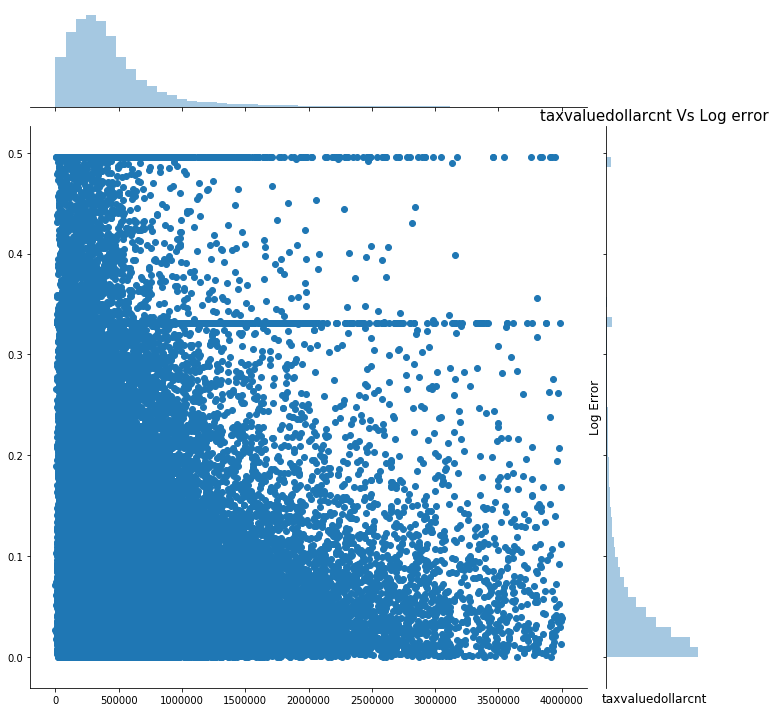

In [67]:
plt.figure(figsize=(6,6))
sns.jointplot(x=taxdollr.taxvaluedollarcnt.values, y=taxdollr.abs_logerror.values, height=10)
plt.ylabel('Log Error', fontsize=12)
plt.xlabel('taxvaluedollarcnt', fontsize=12)
plt.title("taxvaluedollarcnt Vs Log error", fontsize=15)
plt.show()

#### 18. roomcnt vs abs_logerror

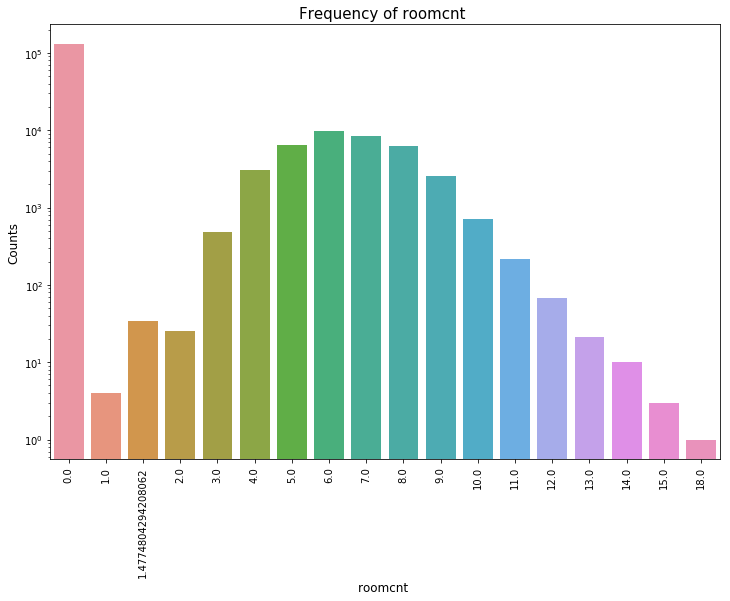

In [68]:
plt.figure(figsize=(12,8))
sns.countplot(x="roomcnt", data=mean_filled_data)
plt.yscale('log')
plt.ylabel('Counts', fontsize=12)
plt.xlabel('roomcnt ', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of roomcnt ", fontsize=15)
plt.show()

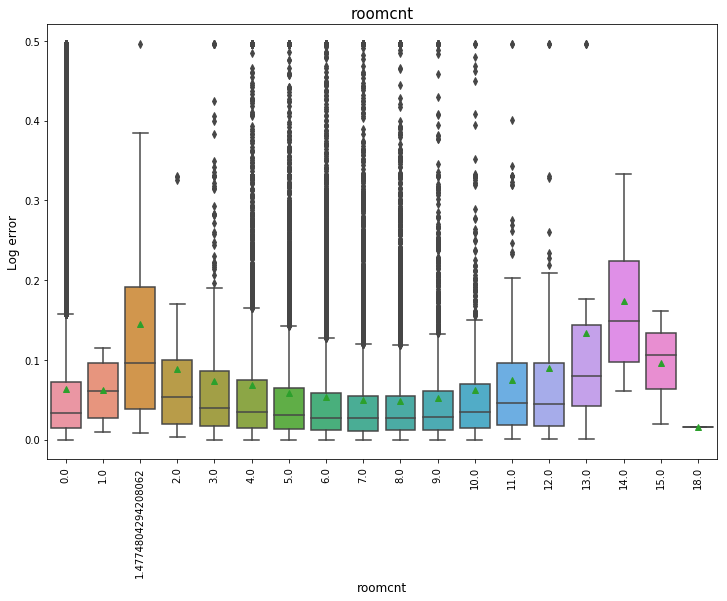

In [69]:
plt.figure(figsize=(12,8))
sns.boxplot(x="roomcnt", y="abs_logerror", data=mean_filled_data,showmeans= True)
plt.ylabel('Log error', fontsize=12)
plt.xlabel('roomcnt', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("roomcnt", fontsize=15)
plt.show()

#### 19. bedroomcnt vs logerror

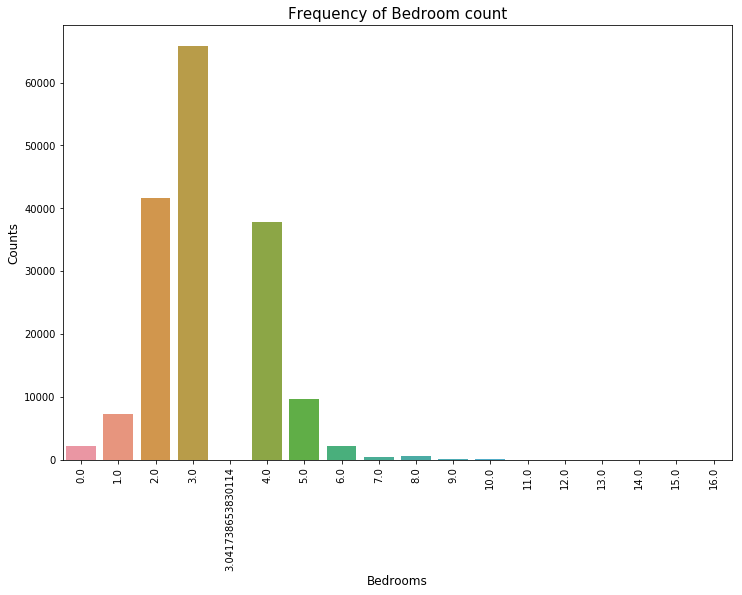

In [70]:
plt.figure(figsize=(12,8))
sns.countplot(x="bedroomcnt", data=mean_filled_data)
plt.ylabel('Counts', fontsize=12)
plt.xlabel('Bedrooms', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of Bedroom count", fontsize=15)
plt.show()

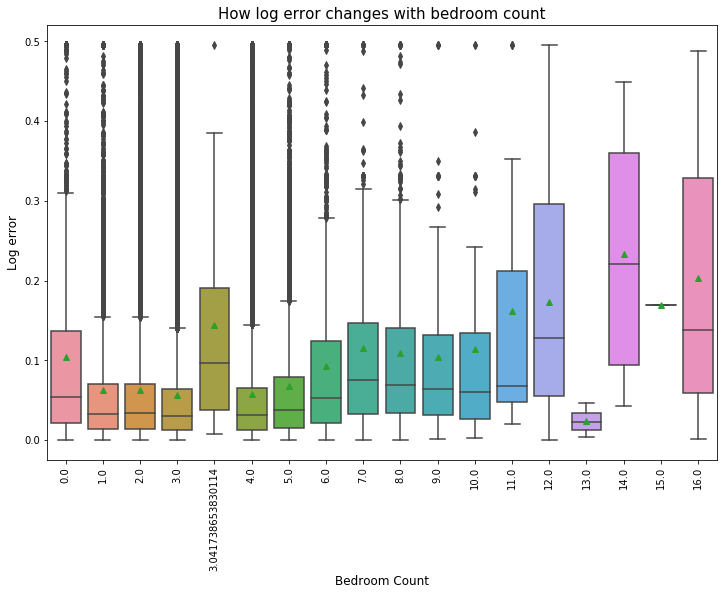

In [71]:
plt.figure(figsize=(12,8))
sns.boxplot(x="bedroomcnt", y="abs_logerror", data=mean_filled_data,showmeans= True)
plt.ylabel('Log error', fontsize=12)
plt.xlabel('Bedroom Count', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("How log error changes with bedroom count", fontsize=15)
plt.show()

#### 20. propertylandusetypeid vs abs_logerror

In [72]:
landusetypeid = mean_filled_data[mean_filled_data['propertylandusetypeid']> 220]

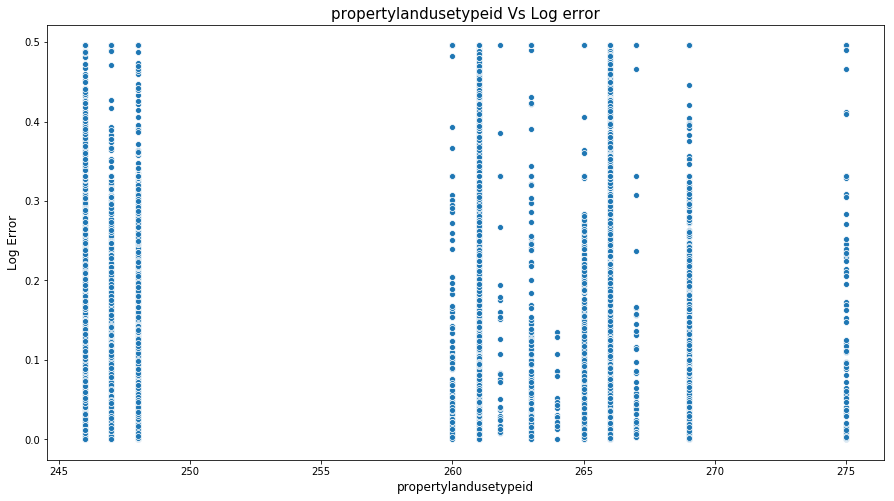

In [73]:
plt.figure(figsize=(15,8))
sns.scatterplot(x=landusetypeid.propertylandusetypeid.values, y=landusetypeid.abs_logerror.values)
plt.ylabel('Log Error', fontsize=12)
plt.xlabel('propertylandusetypeid', fontsize=12)
plt.title("propertylandusetypeid Vs Log error", fontsize=15)
plt.show()

#### 21. longitude vs abs_logerror

<Figure size 432x432 with 0 Axes>

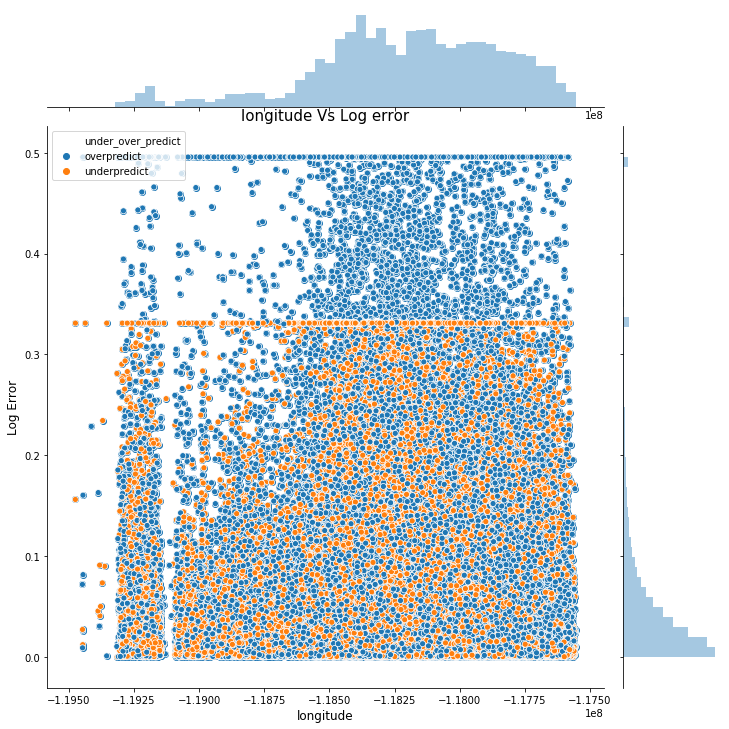

In [74]:
plt.figure(figsize=(6,6))
sns.jointplot(x=mean_filled_data.longitude.values, y=mean_filled_data.abs_logerror.values, height=10).plot_joint(sns.scatterplot,hue = mean_filled_data.under_over_predict)
plt.ylabel('Log Error', fontsize=12)
plt.xlabel('longitude', fontsize=12)
plt.title("longitude Vs Log error", fontsize=15)
plt.show()

#### 22. latitude vs abs_logerror

<Figure size 432x432 with 0 Axes>

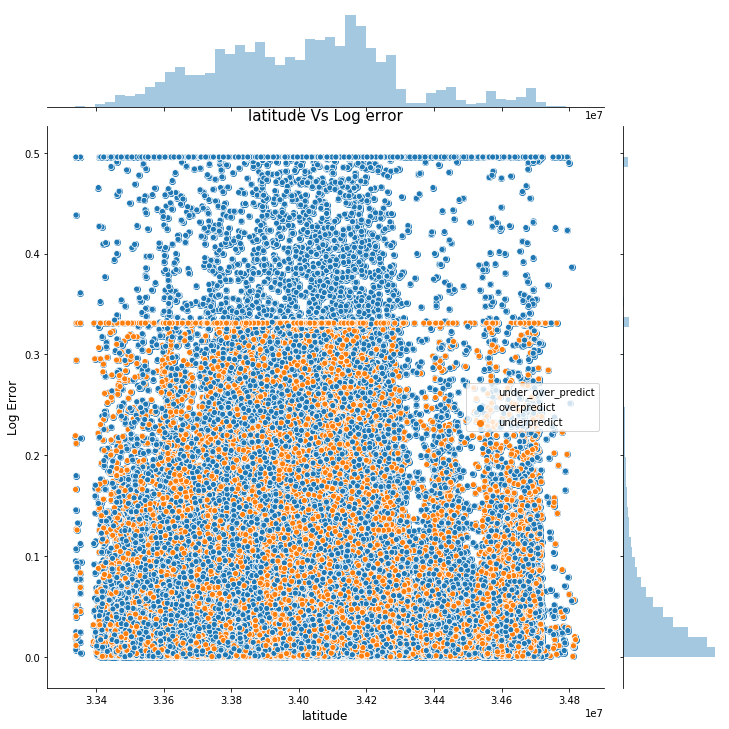

In [75]:
plt.figure(figsize=(6,6))
sns.jointplot(x=mean_filled_data.latitude.values, y=mean_filled_data.abs_logerror.values, height=10).plot_joint(sns.scatterplot,hue = mean_filled_data.under_over_predict)
plt.ylabel('Log Error', fontsize=12)
plt.xlabel('latitude', fontsize=12)
plt.title("latitude Vs Log error", fontsize=15)
plt.show()

## 3. Where is Zestimate bad at?

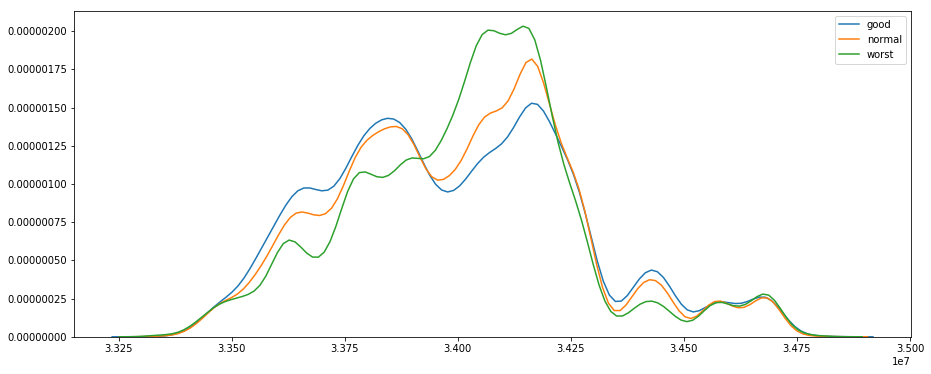

In [76]:
#Latitude density distribution plot
plt.figure(figsize=(15,6))
target_0 = mean_filled_data.loc[mean_filled_data['error_level'] == 'good']
target_1 = mean_filled_data.loc[mean_filled_data['error_level'] == 'normal']
target_2 = mean_filled_data.loc[mean_filled_data['error_level'] == 'worst']

sns.distplot(target_0[['latitude']], hist=False, rug=False,label = 'good')
sns.distplot(target_1[['latitude']], hist=False, rug=False,label = 'normal')
sns.distplot(target_2[['latitude']], hist=False, rug=False,label = 'worst')
plt.legend()
plt.show()

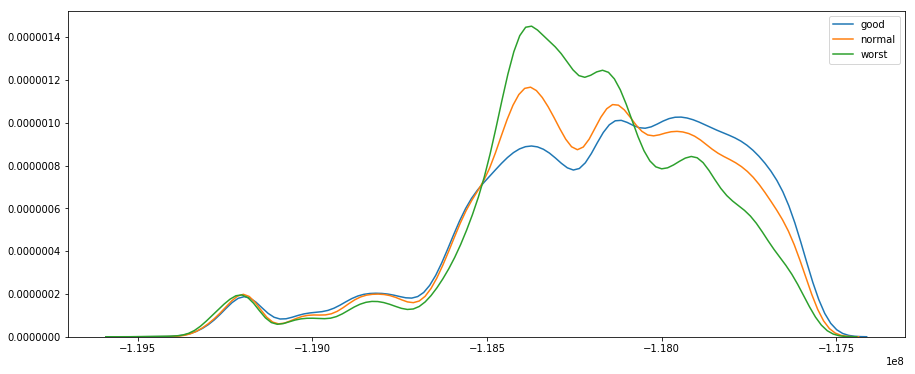

In [77]:
#longitude density distribution plot
plt.figure(figsize=(15,6))
sns.distplot(target_0[['longitude']], hist=False, rug=False,label = 'good')
sns.distplot(target_1[['longitude']], hist=False, rug=False,label = 'normal')
sns.distplot(target_2[['longitude']], hist=False, rug=False,label = 'worst')
plt.legend()
plt.show()

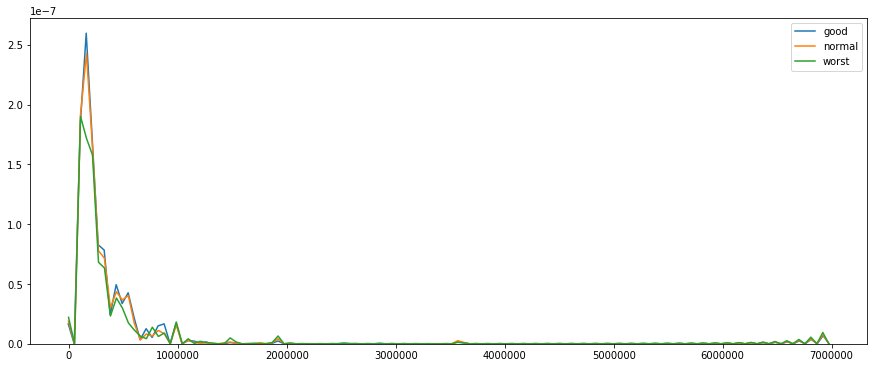

In [78]:
plt.figure(figsize=(15,6))
sns.distplot(target_0[['lotsizesquarefeet']], hist=False, rug=False,label = 'good')
sns.distplot(target_1[['lotsizesquarefeet']], hist=False, rug=False,label = 'normal')
sns.distplot(target_2[['lotsizesquarefeet']], hist=False, rug=False,label = 'worst')
plt.legend()
plt.show()

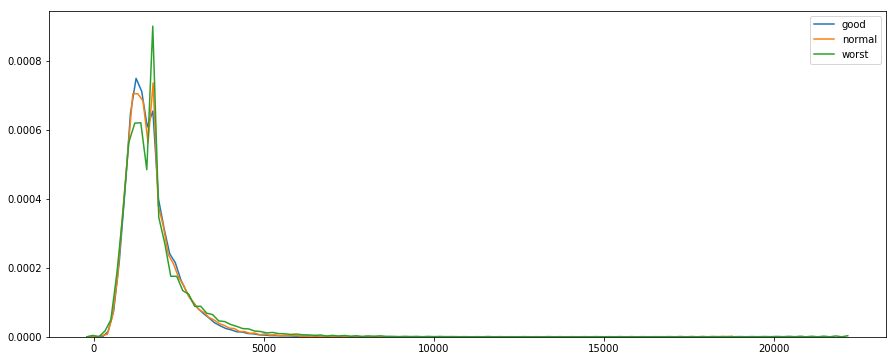

In [79]:
plt.figure(figsize=(15,6))
sns.distplot(target_0[['finishedsquarefeet12']], hist=False, rug=False,label = 'good')
sns.distplot(target_1[['finishedsquarefeet12']], hist=False, rug=False,label = 'normal')
sns.distplot(target_2[['finishedsquarefeet12']], hist=False, rug=False,label = 'worst')
plt.legend()
plt.show()

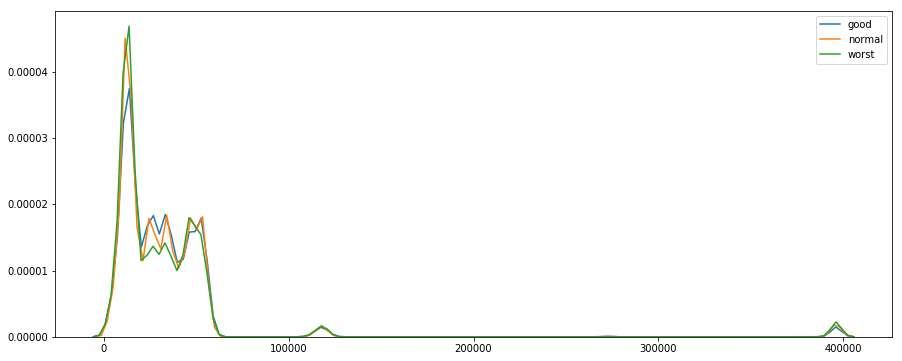

In [80]:
plt.figure(figsize=(15,6))
sns.distplot(target_0[['regionidcity']], hist=False, rug=False,label = 'good')
sns.distplot(target_1[['regionidcity']], hist=False, rug=False,label = 'normal')
sns.distplot(target_2[['regionidcity']], hist=False, rug=False,label = 'worst')
plt.legend()
plt.show()

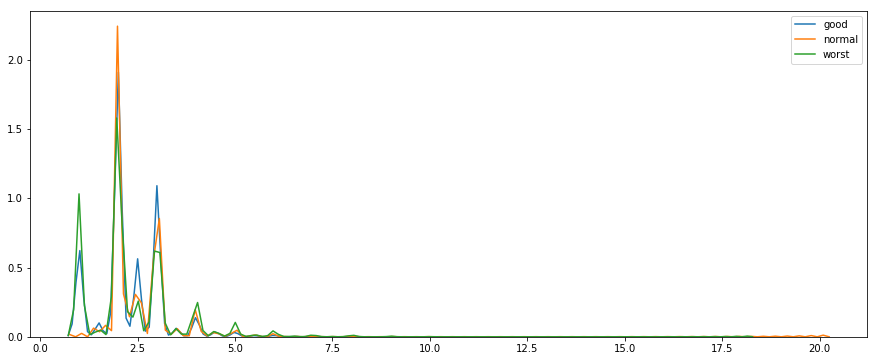

In [81]:
plt.figure(figsize=(15,6))
sns.distplot(target_0[['calculatedbathnbr']], hist=False, rug=False,label = 'good')
sns.distplot(target_1[['calculatedbathnbr']], hist=False, rug=False,label = 'normal')
sns.distplot(target_2[['calculatedbathnbr']], hist=False, rug=False,label = 'worst')
plt.legend()
plt.show()

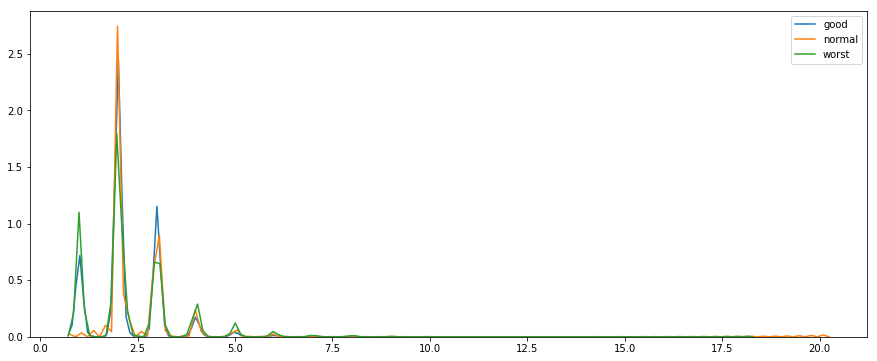

In [82]:
plt.figure(figsize=(15,6))
sns.distplot(target_0[['fullbathcnt']], hist=False, rug=False,label = 'good')
sns.distplot(target_1[['fullbathcnt']], hist=False, rug=False,label = 'normal')
sns.distplot(target_2[['fullbathcnt']], hist=False, rug=False,label = 'worst')
plt.legend()
plt.show()

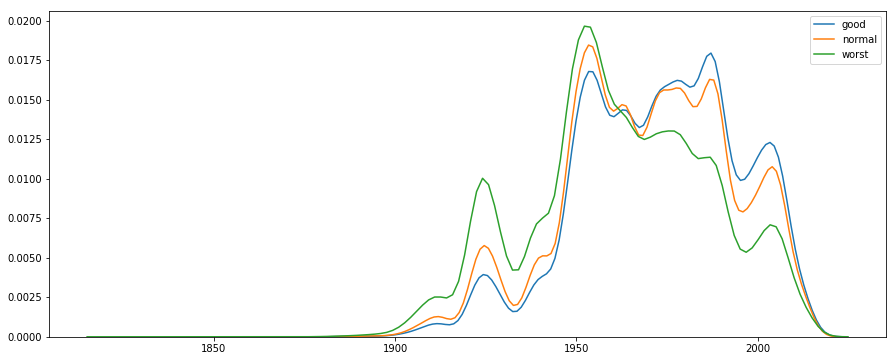

In [83]:
plt.figure(figsize=(15,6))
sns.distplot(target_0[['yearbuilt']], hist=False, rug=False,label = 'good')
sns.distplot(target_1[['yearbuilt']], hist=False, rug=False,label = 'normal')
sns.distplot(target_2[['yearbuilt']], hist=False, rug=False,label = 'worst')
plt.legend()
plt.show()

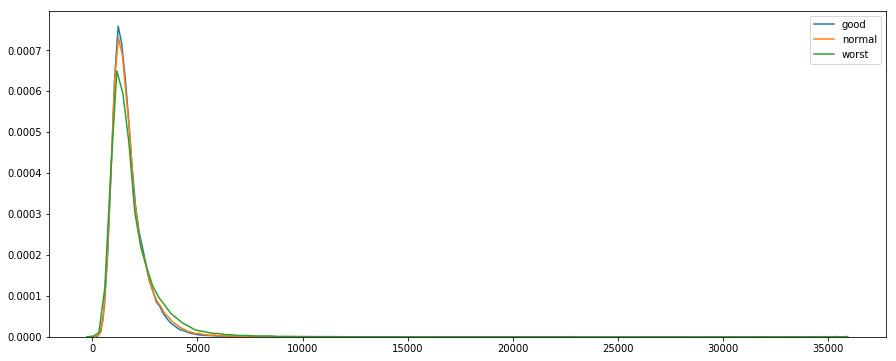

In [84]:
plt.figure(figsize=(15,6))
sns.distplot(target_0[['calculatedfinishedsquarefeet']], hist=False, rug=False,label = 'good')
sns.distplot(target_1[['calculatedfinishedsquarefeet']], hist=False, rug=False,label = 'normal')
sns.distplot(target_2[['calculatedfinishedsquarefeet']], hist=False, rug=False,label = 'worst')
plt.legend()
plt.show()

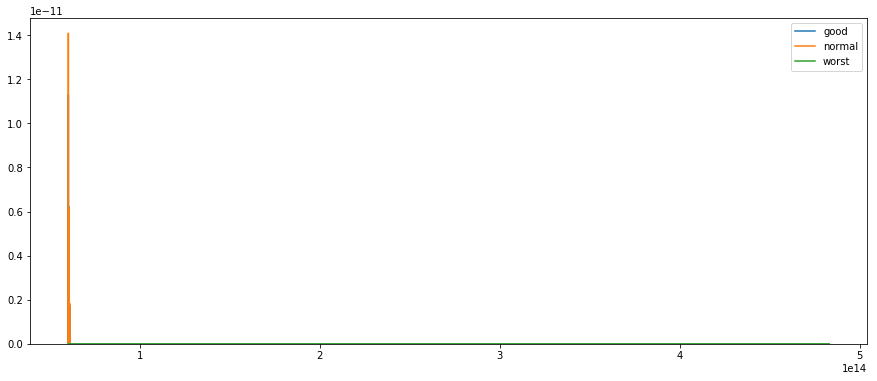

In [85]:
plt.figure(figsize=(15,6))
sns.distplot(target_0[['censustractandblock']], hist=False, rug=False,label = 'good')
sns.distplot(target_1[['censustractandblock']], hist=False, rug=False,label = 'normal')
sns.distplot(target_2[['censustractandblock']], hist=False, rug=False,label = 'worst')
plt.legend()
plt.show()

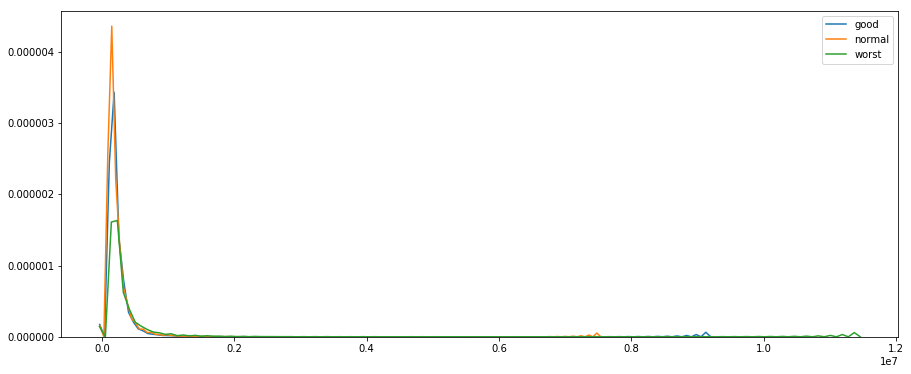

In [86]:
plt.figure(figsize=(15,6))
sns.distplot(target_0[['structuretaxvaluedollarcnt']], hist=False, rug=False,label = 'good')
sns.distplot(target_1[['structuretaxvaluedollarcnt']], hist=False, rug=False,label = 'normal')
sns.distplot(target_2[['structuretaxvaluedollarcnt']], hist=False, rug=False,label = 'worst')
plt.legend()
plt.show()

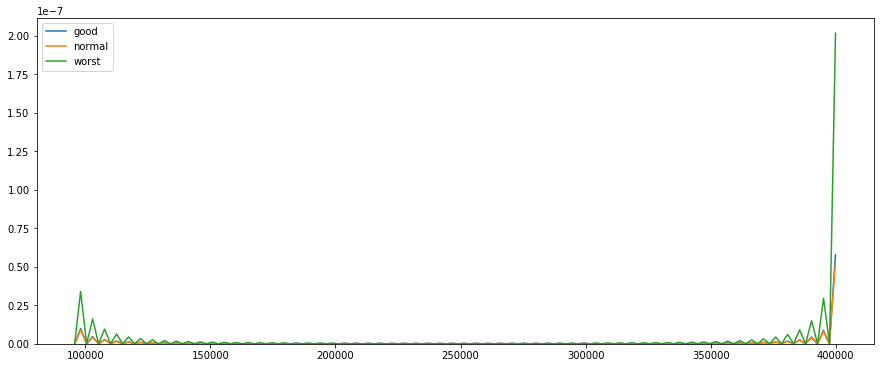

In [87]:
plt.figure(figsize=(15,6))
sns.distplot(target_0[['regionidzip']], hist=False, rug=False,label = 'good')
sns.distplot(target_1[['regionidzip']], hist=False, rug=False,label = 'normal')
sns.distplot(target_2[['regionidzip']], hist=False, rug=False,label = 'worst')
plt.legend()
plt.show()

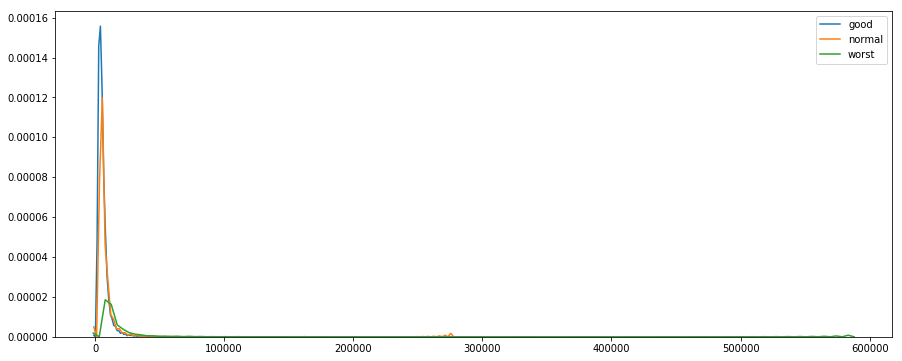

In [88]:
plt.figure(figsize=(15,6))
sns.distplot(target_0[['taxamount']], hist=False, rug=False,label = 'good')
sns.distplot(target_1[['taxamount']], hist=False, rug=False,label = 'normal')
sns.distplot(target_2[['taxamount']], hist=False, rug=False,label = 'worst')
plt.legend()
plt.show()

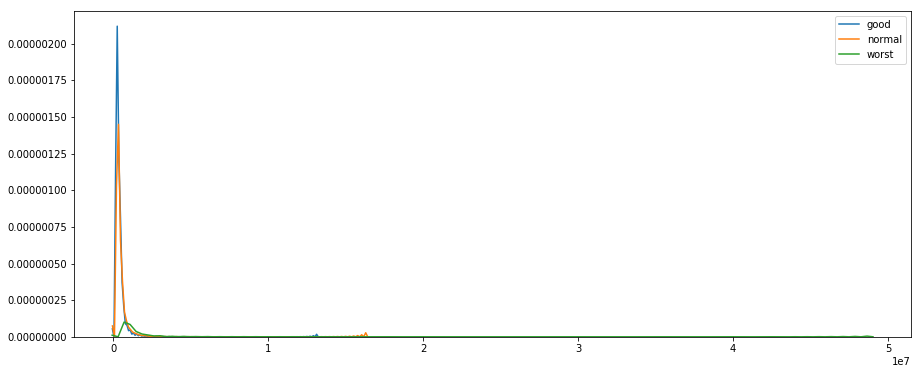

In [89]:
plt.figure(figsize=(15,6))
sns.distplot(target_0[['landtaxvaluedollarcnt']], hist=False, rug=False,label = 'good')
sns.distplot(target_1[['landtaxvaluedollarcnt']], hist=False, rug=False,label = 'normal')
sns.distplot(target_2[['landtaxvaluedollarcnt']], hist=False, rug=False,label = 'worst')
plt.legend()
plt.show()

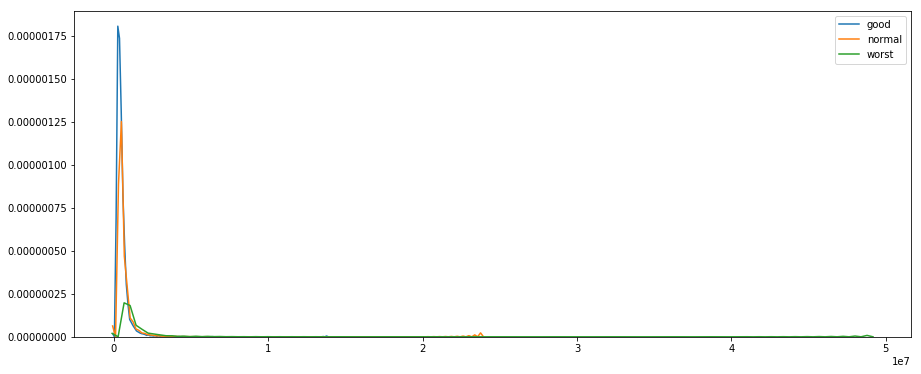

In [90]:
plt.figure(figsize=(15,6))
sns.distplot(target_0[['taxvaluedollarcnt']], hist=False, rug=False,label = 'good')
sns.distplot(target_1[['taxvaluedollarcnt']], hist=False, rug=False,label = 'normal')
sns.distplot(target_2[['taxvaluedollarcnt']], hist=False, rug=False,label = 'worst')
plt.legend()
plt.show()

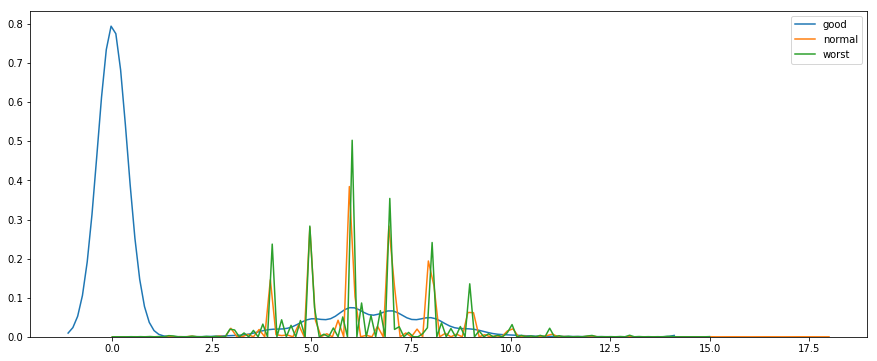

In [91]:
plt.figure(figsize=(15,6))
sns.distplot(target_0[['roomcnt']], hist=False, rug=False,label = 'good')
sns.distplot(target_1[['roomcnt']], hist=False, rug=False,label = 'normal')
sns.distplot(target_2[['roomcnt']], hist=False, rug=False,label = 'worst')
plt.legend()
plt.show()

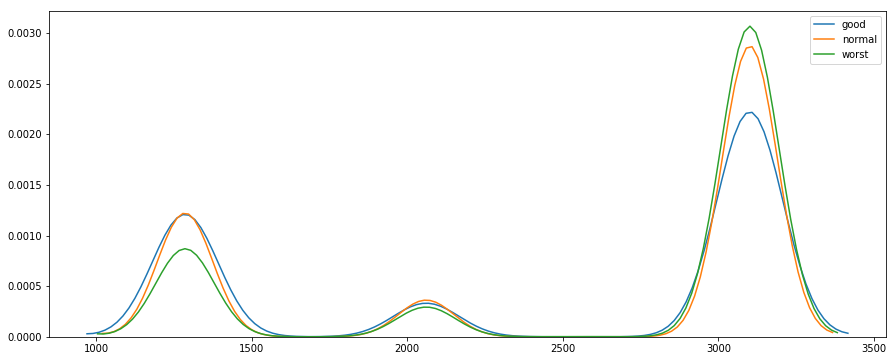

In [92]:
plt.figure(figsize=(15,6))
sns.distplot(target_0[['regionidcounty']], hist=False, rug=False,label = 'good')
sns.distplot(target_1[['regionidcounty']], hist=False, rug=False,label = 'normal')
sns.distplot(target_2[['regionidcounty']], hist=False, rug=False,label = 'worst')
plt.legend()
plt.show()

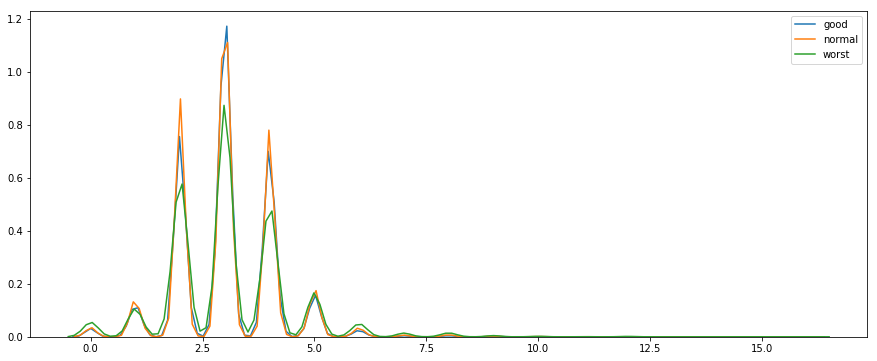

In [93]:
plt.figure(figsize=(15,6))
sns.distplot(target_0[['bedroomcnt']], hist=False, rug=False,label = 'good')
sns.distplot(target_1[['bedroomcnt']], hist=False, rug=False,label = 'normal')
sns.distplot(target_2[['bedroomcnt']], hist=False, rug=False,label = 'worst')
plt.legend()
plt.show()

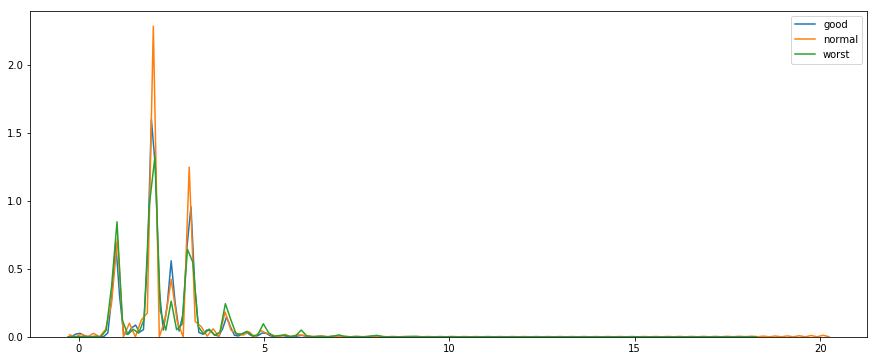

In [94]:
plt.figure(figsize=(15,6))
sns.distplot(target_0[['bathroomcnt']], hist=False, rug=False,label = 'good')
sns.distplot(target_1[['bathroomcnt']], hist=False, rug=False,label = 'normal')
sns.distplot(target_2[['bathroomcnt']], hist=False, rug=False,label = 'worst')
plt.legend()
plt.show()

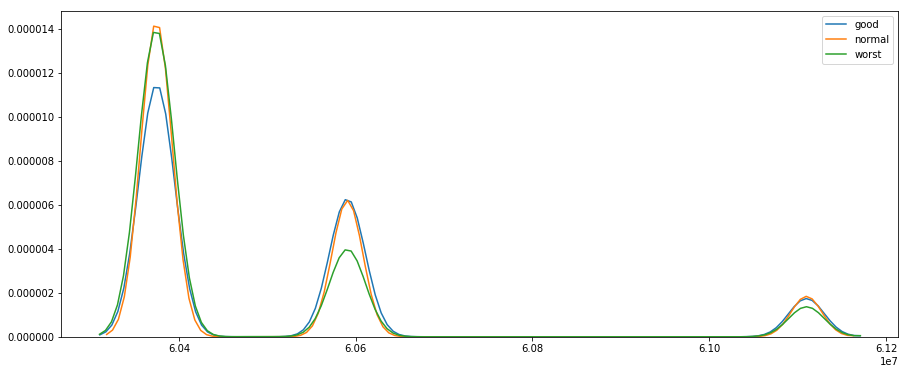

In [95]:
plt.figure(figsize=(15,6))
sns.distplot(target_0[['rawcensustractandblock']], hist=False, rug=False,label = 'good')
sns.distplot(target_1[['rawcensustractandblock']], hist=False, rug=False,label = 'normal')
sns.distplot(target_2[['rawcensustractandblock']], hist=False, rug=False,label = 'worst')
plt.legend()
plt.show()

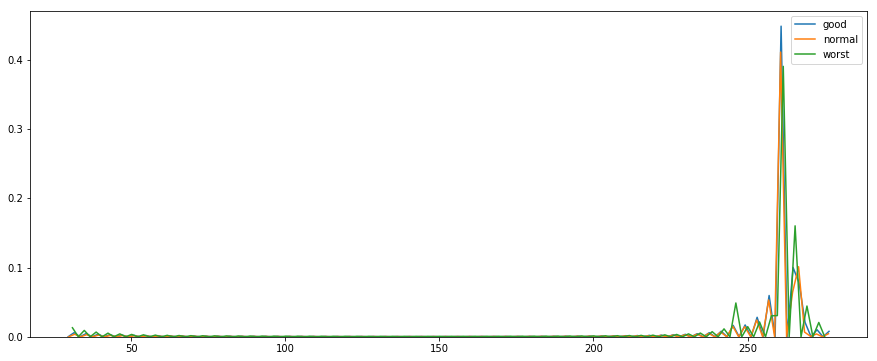

In [96]:
plt.figure(figsize=(15,6))
sns.distplot(target_0[['propertylandusetypeid']], hist=False, rug=False,label = 'good')
sns.distplot(target_1[['propertylandusetypeid']], hist=False, rug=False,label = 'normal')
sns.distplot(target_2[['propertylandusetypeid']], hist=False, rug=False,label = 'worst')
plt.legend()
plt.show()

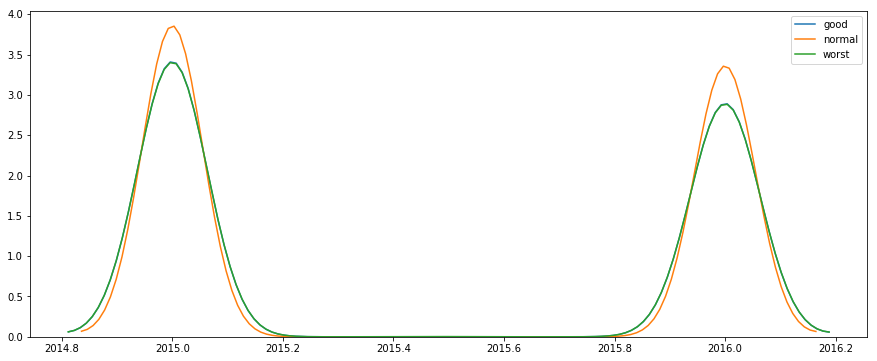

In [97]:
plt.figure(figsize=(15,6))
sns.distplot(target_0[['assessmentyear']], hist=False, rug=False,label = 'good')
sns.distplot(target_1[['assessmentyear']], hist=False, rug=False,label = 'normal')
sns.distplot(target_2[['assessmentyear']], hist=False, rug=False,label = 'worst')
plt.legend()
plt.show()

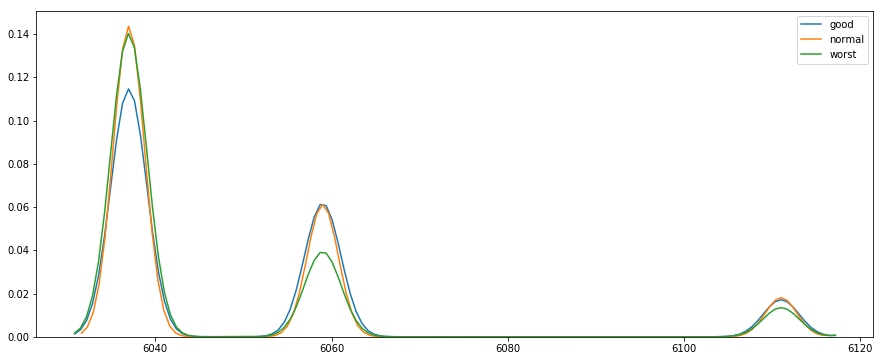

In [98]:
plt.figure(figsize=(15,6))
sns.distplot(target_0[['fips']], hist=False, rug=False,label = 'good')
sns.distplot(target_1[['fips']], hist=False, rug=False,label = 'normal')
sns.distplot(target_2[['fips']], hist=False, rug=False,label = 'worst')
plt.legend()
plt.show()

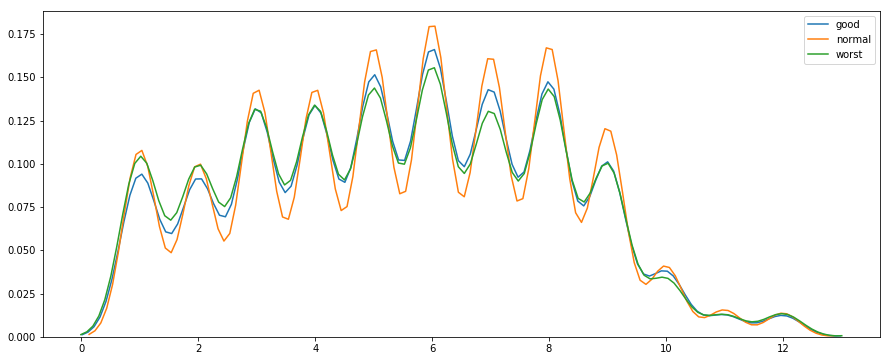

In [99]:
plt.figure(figsize=(15,6))
sns.distplot(target_0[['transaction_month']], hist=False, rug=False,label = 'good')
sns.distplot(target_1[['transaction_month']], hist=False, rug=False,label = 'normal')
sns.distplot(target_2[['transaction_month']], hist=False, rug=False,label = 'worst')
plt.legend()
plt.show()

Based on the density distribution plot(DDP) on each variable, location-related variables revealed their importance on housing price prediction. Such as longitude, latitude, and county fips code, we can see where the error come from based on their DDP. So let's implement the algorithm based on the location.

In [101]:
#convert longitude and latitude value to the normal value
mean_filled_data['normal_lon'] = mean_filled_data['longitude']/1000000
mean_filled_data['normal_lat'] = mean_filled_data['latitude']/1000000

Making sure our training dataframe and predicting dataframe have the same columns

In [107]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
mean_filled_data2 = mean_filled_data.select_dtypes(include=numerics)
mean_filled_data2.drop(['roomcnt'],axis = 1 ,inplace = True)

In [109]:
mean_filled_data2.columns

Index(['lotsizesquarefeet', 'finishedsquarefeet12', 'regionidcity',
       'calculatedbathnbr', 'fullbathcnt', 'yearbuilt',
       'calculatedfinishedsquarefeet', 'censustractandblock',
       'structuretaxvaluedollarcnt', 'regionidzip', 'taxamount',
       'landtaxvaluedollarcnt', 'taxvaluedollarcnt', 'longitude',
       'regionidcounty', 'bedroomcnt', 'bathroomcnt', 'rawcensustractandblock',
       'propertylandusetypeid', 'assessmentyear', 'latitude', 'fips',
       'parcelid', 'logerror', 'transaction_month', 'abs_logerror',
       'normal_lon', 'normal_lat'],
      dtype='object')

In [111]:
mergesubmission.columns

Index(['parcelid', '201610', '201611', '201612', '201710', '201711', '201712',
       'logerror', 'transactiondate', 'airconditioningtypeid',
       'architecturalstyletypeid', 'basementsqft', 'bathroomcnt', 'bedroomcnt',
       'buildingclasstypeid', 'buildingqualitytypeid', 'calculatedbathnbr',
       'decktypeid', 'finishedfloor1squarefeet',
       'calculatedfinishedsquarefeet', 'finishedsquarefeet12',
       'finishedsquarefeet13', 'finishedsquarefeet15', 'finishedsquarefeet50',
       'finishedsquarefeet6', 'fips', 'fireplacecnt', 'fullbathcnt',
       'garagecarcnt', 'garagetotalsqft', 'hashottuborspa',
       'heatingorsystemtypeid', 'latitude', 'longitude', 'lotsizesquarefeet',
       'poolcnt', 'poolsizesum', 'pooltypeid10', 'pooltypeid2', 'pooltypeid7',
       'propertycountylandusecode', 'propertylandusetypeid',
       'propertyzoningdesc', 'rawcensustractandblock', 'regionidcity',
       'regionidcounty', 'regionidneighborhood', 'regionidzip', 'roomcnt',
       'storytypei

In [114]:
mergesubmission2 = mergesubmission[['lotsizesquarefeet', 'finishedsquarefeet12', 'regionidcity',
       'calculatedbathnbr', 'fullbathcnt', 'yearbuilt',
       'calculatedfinishedsquarefeet', 'censustractandblock',
       'structuretaxvaluedollarcnt', 'regionidzip', 'taxamount',
       'landtaxvaluedollarcnt', 'taxvaluedollarcnt', 'longitude',
       'regionidcounty', 'bedroomcnt', 'bathroomcnt', 'rawcensustractandblock',
       'propertylandusetypeid', 'assessmentyear', 'latitude', 'fips',
       'parcelid', 'logerror', 'abs_logerror',
       'normal_lon', 'normal_lat']]

In [115]:
#Checking how many nan values are there for each column
data_missing = mergesubmission2.isnull().sum(axis=0).reset_index()
data_missing.columns = ['variable', 'missing_values']
data_missing['filling_factor']=(mergesubmission2.shape[0]-data_missing['missing_values'])/mergesubmission2.shape[0]*100
data_missing= data_missing.sort_values('filling_factor').reset_index(drop = True)
data_missing

variable  missing_values  filling_factor
0                       logerror         2895067        3.019881
1                   abs_logerror         2895067        3.019881
2              lotsizesquarefeet          276099       90.751125
3           finishedsquarefeet12          276033       90.753336
4              calculatedbathnbr          128912       95.681654
5                    fullbathcnt          128912       95.681654
6            censustractandblock           75126       97.483399
7          landtaxvaluedollarcnt           67733       97.731053
8                   regionidcity           62845       97.894793
9                      yearbuilt           59928       97.992508
10  calculatedfinishedsquarefeet           55565       98.138661
11    structuretaxvaluedollarcnt           54982       98.158191
12             taxvaluedollarcnt           42550       98.574643
13                     taxamount           31250       98.953175
14                   regionidzip           13980       99.531692
15                   bathroomcnt           11462       99.616041
16                    bedroomcnt           11450       99.616443
17                assessmentyear           11439       99.616812
18                          fips           11437       99.616879
19                      latitude           11437       99.616879
20                     longitude           11437       99.616879
21        rawcensustractandblock           11437       99.616879
22                regionidcounty           11437       99.616879
23                    normal_lon           11437       99.616879
24         propertylandusetypeid           11437       99.616879
25                    normal_lat           11437       99.616879
26                      parcelid               0      100.000000

In [116]:
mergesubmission2.dtypes

lotsizesquarefeet               float64
finishedsquarefeet12            float64
regionidcity                    float64
calculatedbathnbr               float64
fullbathcnt                     float64
yearbuilt                       float64
calculatedfinishedsquarefeet    float64
censustractandblock             float64
structuretaxvaluedollarcnt      float64
regionidzip                     float64
taxamount                       float64
landtaxvaluedollarcnt           float64
taxvaluedollarcnt               float64
longitude                       float64
regionidcounty                  float64
bedroomcnt                      float64
bathroomcnt                     float64
rawcensustractandblock          float64
propertylandusetypeid           float64
assessmentyear                  float64
latitude                        float64
fips                            float64
parcelid                          int64
logerror                        float64
abs_logerror                    float64


In [118]:
meanvalues = mergesubmission2.mean(axis=0)
mergesubmission2 = mergesubmission2.fillna(meanvalues)

In [119]:
#Checking how many nan values are there for each column
data_missing = mergesubmission2.isnull().sum(axis=0).reset_index()
data_missing.columns = ['variable', 'missing_values']
data_missing['filling_factor']=(mergesubmission2.shape[0]-data_missing['missing_values'])/mergesubmission2.shape[0]*100
data_missing= data_missing.sort_values('filling_factor').reset_index(drop = True)
data_missing

variable  missing_values  filling_factor
0              lotsizesquarefeet               0           100.0
1                   abs_logerror               0           100.0
2                       logerror               0           100.0
3                       parcelid               0           100.0
4                           fips               0           100.0
5                       latitude               0           100.0
6                 assessmentyear               0           100.0
7          propertylandusetypeid               0           100.0
8         rawcensustractandblock               0           100.0
9                    bathroomcnt               0           100.0
10                    bedroomcnt               0           100.0
11                regionidcounty               0           100.0
12                    normal_lon               0           100.0
13                     longitude               0           100.0
14         landtaxvaluedollarcnt               0           100.0
15                     taxamount               0           100.0
16                   regionidzip               0           100.0
17    structuretaxvaluedollarcnt               0           100.0
18           censustractandblock               0           100.0
19  calculatedfinishedsquarefeet               0           100.0
20                     yearbuilt               0           100.0
21                   fullbathcnt               0           100.0
22             calculatedbathnbr               0           100.0
23                  regionidcity               0           100.0
24          finishedsquarefeet12               0           100.0
25             taxvaluedollarcnt               0           100.0
26                    normal_lat               0           100.0

# Model Comparison

Next, we are going to compare different model and pick the one that have the best result, then tune it up, then fit our data, and finally start predicting.

In [105]:
from sklearn import linear_model
from sklearn import neighbors
from sklearn import preprocessing
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score, train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [125]:
regr = linear_model.LinearRegression()
knn = neighbors.KNeighborsRegressor(n_neighbors=15,weights = 'distance')
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
KRR = KernelRidge(alpha=0.6)
GBoost = GradientBoostingRegressor(n_estimators=200, learning_rate=0.05,
                                   max_depth=8,max_features = 'sqrt',subsample = 0.8,
                                   min_samples_leaf=50, min_samples_split=1000, 
                                   loss='huber', random_state =5)

In [126]:
#Validation function
def rmsle_cv(model,df):
    X = df.drop(['logerror','abs_logerror','transaction_month','parcelid'],axis = 1)
    Y = df['logerror']
    rmse= cross_val_score(model, X, Y, scoring="neg_mean_squared_error", cv = 5)
    return(rmse)

In [127]:
score = rmsle_cv(regr,mean_filled_data2)
print("\nLinear Regression score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmsle_cv(knn,mean_filled_data2)
print("\nKNN score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmsle_cv(lasso,mean_filled_data2)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
# score = rmsle_cv(KRR,mean_filled_data2)
# print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmsle_cv(GBoost,mean_filled_data2)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Linear Regression score: -0.0119 (0.0027)


KNN score: -0.0115 (0.0005)


Lasso score: -0.0105 (0.0005)

Gradient Boosting score: -0.0103 (0.0005)



We can see that the Gradien Boosting got the best score, so let's tune the model for a better result.

# Model Tunning

In [198]:
#We are gonna need to tune each parameter separately, so let's start with n_estimator
param_test1 = {'n_estimators':range(20,200,10)}
gsearch1 = GridSearchCV(estimator = GradientBoostingRegressor(learning_rate=0.05,
                                                              max_depth=8,
                                                              max_features = 'sqrt',
                                                              subsample = 0.8,
                                                              min_samples_leaf=50, 
                                                              min_samples_split=10000, 
                                                              loss='huber', 
                                                              random_state =5), 
param_grid = param_test1, 
scoring='neg_mean_squared_error',n_jobs=-1,iid=False, cv=5)
gsearch1.fit(mean_filled_data2.drop(['logerror','abs_logerror','transaction_month','parcelid'],axis = 1),
             mean_filled_data2['logerror'])

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='huber', max_depth=8,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=50, mi...       subsample=0.8, tol=0.0001, validation_fraction=0.1, verbose=0,
             warm_start=False),
       fit_params=None, iid=False, n_jobs=-1,
       param_grid={'n_estimators': range(20, 200, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [200]:
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessi

({'mean_fit_time': array([ 19.66667352,  28.05295272,  35.74891863,  43.38160329,
          52.64784379,  60.19858127,  68.37215872,  76.92912145,
          85.36500812,  95.7823082 , 103.6171165 , 110.2930831 ,
         120.59968653, 129.41297045, 138.00976   , 145.93030887,
         149.15430579, 114.53019371]),
  'std_fit_time': array([ 0.51316166,  1.29864364,  0.76192925,  0.68690453,  0.68428139,
          0.51434039,  0.56166947,  0.61503   ,  0.99821359,  0.56489759,
          0.1374411 ,  0.9743516 ,  0.63599013,  0.53809311,  1.07163439,
          0.28722097,  3.40144965, 18.46246217]),
  'mean_score_time': array([0.08224697, 0.10450454, 0.13185396, 0.15421257, 0.18136353,
         0.21639843, 0.22108874, 0.25672278, 0.27668581, 0.30942378,
         0.31171889, 0.34226289, 0.36761599, 0.38328729, 0.42041855,
         0.42880106, 0.40594311, 0.23476033]),
  'std_score_time': array([0.00814861, 0.0076309 , 0.00664687, 0.01102463, 0.01070146,
         0.00647393, 0.01770237, 0.0

In [204]:
#The best result end up at 190, 
#so there is a fare chance that higher n_estimator may have better result
param_test2 = {'n_estimators':range(200,1001,100)}
gsearch2 = GridSearchCV(estimator = GradientBoostingRegressor(learning_rate=0.05,
                                                              max_depth=8,
                                                              max_features = 'sqrt',
                                                              subsample = 0.8,
                                                              min_samples_leaf=50, 
                                                              min_samples_split=10000, 
                                                              loss='huber', 
                                                              random_state =5), 
param_grid = param_test2, 
scoring='neg_mean_squared_error',n_jobs=-1,iid=False, cv=5)
gsearch2.fit(mean_filled_data2.drop(['logerror','abs_logerror','transaction_month','parcelid'],axis = 1),
             mean_filled_data2['logerror'])

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='huber', max_depth=8,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=50, mi...       subsample=0.8, tol=0.0001, validation_fraction=0.1, verbose=0,
             warm_start=False),
       fit_params=None, iid=False, n_jobs=-1,
       param_grid={'n_estimators': range(200, 1001, 100)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [205]:
gsearch2.cv_results_, gsearch2.best_params_, gsearch2.best_score_

D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessi

({'mean_fit_time': array([131.16870461, 210.8708612 , 296.68992491, 363.67606487,
         430.57447047, 499.00891223, 575.27736435, 648.03146162,
         481.35968542]),
  'std_fit_time': array([ 1.53470851, 11.14635384,  4.70608747,  3.34606248,  4.85387145,
          5.04663807,  7.74935216, 17.61090215, 77.1611347 ]),
  'mean_score_time': array([0.43329344, 0.68183036, 0.87247472, 1.20685267, 1.364258  ,
         1.63844919, 1.89537015, 1.86892037, 1.12760262]),
  'std_score_time': array([0.01669759, 0.04727624, 0.04238965, 0.10884842, 0.05083655,
         0.04021362, 0.03985194, 0.24342732, 0.17760674]),
  'param_n_estimators': masked_array(data=[200, 300, 400, 500, 600, 700, 800, 900, 1000],
               mask=[False, False, False, False, False, False, False, False,
                     False],
         fill_value='?',
              dtype=object),
  'params': [{'n_estimators': 200},
   {'n_estimators': 300},
   {'n_estimators': 400},
   {'n_estimators': 500},
   {'n_estimators'

Because we are going to tune n_estimator and learning_rate proportionaly later on, so let's just keep it at 1000. Next, we are going to tune the max_depth.

In [206]:
param_test3 = {'max_depth':range(5,10,1)}
gsearch3 = GridSearchCV(estimator = GradientBoostingRegressor(n_estimators=500,
                                                              learning_rate=0.05,
                                                              max_features = 'sqrt',
                                                              subsample = 0.8,
                                                              min_samples_split = 10000,
                                                              min_samples_leaf=50, 
                                                              loss='huber', 
                                                              random_state =5), 
param_grid = param_test3, 
scoring='neg_mean_squared_error',n_jobs=-1,iid=False, cv=5)
gsearch3.fit(mean_filled_data2.drop(['logerror','abs_logerror','transaction_month','parcelid'],axis = 1),
             mean_filled_data2['logerror'])

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='huber', max_depth=3,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=50, mi...       subsample=0.8, tol=0.0001, validation_fraction=0.1, verbose=0,
             warm_start=False),
       fit_params=None, iid=False, n_jobs=-1,
       param_grid={'max_depth': range(5, 10)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [207]:
gsearch3.cv_results_, gsearch3.best_params_, gsearch3.best_score_

D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessi

({'mean_fit_time': array([254.35227809, 292.53526244, 332.79957094, 375.21088066,
         322.04679999]),
  'std_fit_time': array([ 1.15683459,  3.66728054,  1.39309888,  5.22110787, 99.78640097]),
  'mean_score_time': array([0.97338867, 1.03227921, 1.087077  , 1.09486074, 0.72135844]),
  'std_score_time': array([0.04491269, 0.06527181, 0.0416405 , 0.09814107, 0.09554442]),
  'param_max_depth': masked_array(data=[5, 6, 7, 8, 9],
               mask=[False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'max_depth': 5},
   {'max_depth': 6},
   {'max_depth': 7},
   {'max_depth': 8},
   {'max_depth': 9}],
  'split0_test_score': array([-0.01092998, -0.01091834, -0.01091629, -0.01090737, -0.01090373]),
  'split1_test_score': array([-0.00949963, -0.00949115, -0.00947917, -0.00947711, -0.00947547]),
  'split2_test_score': array([-0.01064023, -0.01063044, -0.01061652, -0.01060965, -0.01061341]),
  'split3_test_score': array([-0.01071178, -0.01

Since there is no much improvements over each test, so let's keep max_depth at 9 and move on to next parameter.

In [208]:
param_test4 = {'min_samples_split':range(1000,10001,1000)}
gsearch4 = GridSearchCV(estimator = GradientBoostingRegressor(n_estimators=500,
                                                              learning_rate=0.05,
                                                              max_features = 'sqrt',
                                                              subsample = 0.8,
                                                              max_depth = 8,
                                                              min_samples_leaf=50, 
                                                              loss='huber', 
                                                              random_state =5), 
param_grid = param_test4, 
scoring='neg_mean_squared_error',n_jobs=-1,iid=False, cv=5)
gsearch4.fit(mean_filled_data2.drop(['logerror','abs_logerror','transaction_month','parcelid'],axis = 1),
             mean_filled_data2['logerror'])

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='huber', max_depth=8,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=50, mi...       subsample=0.8, tol=0.0001, validation_fraction=0.1, verbose=0,
             warm_start=False),
       fit_params=None, iid=False, n_jobs=-1,
       param_grid={'min_samples_split': range(1000, 10001, 1000)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [209]:
gsearch4.cv_results_, gsearch4.best_params_, gsearch4.best_score_

D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessi

({'mean_fit_time': array([349.53031201, 332.24111295, 325.9256742 , 313.41637278,
         313.92592254, 308.88052111, 303.90269108, 302.0598228 ,
         298.83382969, 219.09294558]),
  'std_fit_time': array([ 2.85773836,  0.27521717,  3.607641  ,  3.43697881,  2.11322387,
          2.75233825,  3.85616619,  1.90212919,  1.32960848, 93.56056278]),
  'mean_score_time': array([1.00323219, 0.9757834 , 0.99844208, 1.02509074, 1.03317723,
         1.02948217, 0.96769819, 1.03367662, 0.94274545, 0.60926557]),
  'std_score_time': array([0.08977423, 0.06167634, 0.06690946, 0.05402284, 0.05757247,
         0.05729009, 0.032193  , 0.04972738, 0.11768202, 0.09116072]),
  'param_min_samples_split': masked_array(data=[1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000,
                     10000],
               mask=[False, False, False, False, False, False, False, False,
                     False, False],
         fill_value='?',
              dtype=object),
  'params': [{'min_samples_split'

The best result we have is at min_samples_split = 1000, so let's set to 1000 and move on to next parameter.

In [210]:
param_test5 = {'min_samples_leaf':range(10,101,10)}
gsearch5 = GridSearchCV(estimator = GradientBoostingRegressor(n_estimators=500,
                                                              learning_rate=0.05,
                                                              max_features = 'sqrt',
                                                              subsample = 0.8,
                                                              min_samples_split = 1000,
                                                              max_depth = 8,
                                                              loss='huber', 
                                                              random_state =5), 
param_grid = param_test5, 
scoring='neg_mean_squared_error',n_jobs=-1,iid=False, cv=5)
gsearch5.fit(mean_filled_data2.drop(['logerror','abs_logerror','transaction_month','parcelid'],axis = 1),
             mean_filled_data2['logerror'])

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='huber', max_depth=8,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min...       subsample=0.8, tol=0.0001, validation_fraction=0.1, verbose=0,
             warm_start=False),
       fit_params=None, iid=False, n_jobs=-1,
       param_grid={'min_samples_leaf': range(10, 101, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [211]:
gsearch5.cv_results_, gsearch5.best_params_, gsearch5.best_score_

D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessi

({'mean_fit_time': array([323.9919754 , 328.28308401, 335.45811944, 327.90548625,
         325.97967181, 326.79285836, 327.08701038, 327.28384337,
         330.32088833, 239.62410631]),
  'std_fit_time': array([  1.57511057,   5.35997595,   1.2093676 ,   3.89291721,
           1.76011006,   1.64181484,   2.47417848,   1.6423609 ,
           0.64457066, 109.49421931]),
  'mean_score_time': array([0.92088666, 0.94094853, 0.93426118, 0.95801692, 0.95631881,
         0.99355173, 0.99424992, 1.01540995, 0.99334989, 0.72205667]),
  'std_score_time': array([0.06661736, 0.0893728 , 0.03972935, 0.05921453, 0.07931203,
         0.04116669, 0.08659624, 0.05757309, 0.05489876, 0.17785164]),
  'param_min_samples_leaf': masked_array(data=[10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
               mask=[False, False, False, False, False, False, False, False,
                     False, False],
         fill_value='?',
              dtype=object),
  'params': [{'min_samples_leaf': 10},
   {'min_samples_

min_samples_leaf scores the best at 80, so let's set it as that then move on to the next parameter.

In [213]:
param_test6 = {'max_features':range(5,25,2)}
gsearch6 = GridSearchCV(estimator = GradientBoostingRegressor(n_estimators=500,
                                                              learning_rate=0.05,
                                                              #max_features = 'sqrt',
                                                              subsample = 0.8,
                                                              min_samples_split = 3000,
                                                              min_samples_leaf = 80,
                                                              max_depth = 8,
                                                              loss='huber', 
                                                              random_state =5), 
param_grid = param_test6, 
scoring='neg_mean_squared_error',n_jobs=-1,iid=False, cv=5)
gsearch6.fit(mean_filled_data2.drop(['logerror','abs_logerror','transaction_month','parcelid'],axis = 1),
             mean_filled_data2['logerror'])

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='huber', max_depth=8,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=80, min_...       subsample=0.8, tol=0.0001, validation_fraction=0.1, verbose=0,
             warm_start=False),
       fit_params=None, iid=False, n_jobs=-1,
       param_grid={'max_features': range(5, 25, 2)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [214]:
gsearch6.cv_results_, gsearch6.best_params_, gsearch6.best_score_

D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessi

({'mean_fit_time': array([ 391.72682352,  490.31101227,  590.18659616,  687.38037601,
          788.11416235,  879.46911726,  979.60471845, 1087.96639786,
         1151.49947019,  916.19342031]),
  'std_fit_time': array([  5.78694395,  10.89837788,  11.99089291,  12.63341859,
          15.02717662,  14.17441448,   8.29366663,   7.1138513 ,
          21.22286826, 199.05899143]),
  'mean_score_time': array([1.0456521 , 1.05284033, 1.08318229, 1.05174122, 1.0690105 ,
         1.04515333, 1.05393791, 1.07469821, 0.97269135, 0.58131785]),
  'std_score_time': array([0.07690165, 0.06778673, 0.03600659, 0.02794781, 0.05527193,
         0.05203655, 0.04084752, 0.02330416, 0.11089507, 0.09673245]),
  'param_max_features': masked_array(data=[5, 7, 9, 11, 13, 15, 17, 19, 21, 23],
               mask=[False, False, False, False, False, False, False, False,
                     False, False],
         fill_value='?',
              dtype=object),
  'params': [{'max_features': 5},
   {'max_features': 

I decide to use max_feature = 9 just making sure that ther is enough features to explain most of the variance.

In [217]:
param_test7 = {'subsample':[0.4,0.5,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95]}
gsearch7 = GridSearchCV(estimator = GradientBoostingRegressor(n_estimators=600,
                                                              learning_rate=0.04,
                                                              max_features = 9,
                                                              subsample = 0.8,
                                                              min_samples_split = 3000,
                                                              min_samples_leaf = 80,
                                                              max_depth = 8,
                                                              loss='huber', 
                                                              random_state =5), 
param_grid = param_test7, 
scoring='neg_mean_squared_error',n_jobs=-1,iid=False, cv=5)
gsearch7.fit(mean_filled_data2.drop(['logerror','abs_logerror','transaction_month','parcelid'],axis = 1),
             mean_filled_data2['logerror'])

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.04, loss='huber', max_depth=8, max_features=9,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=80,
             min_sam...ate=5, subsample=0.8, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False),
       fit_params=None, iid=False, n_jobs=-1,
       param_grid={'subsample': [0.4, 0.5, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [218]:
gsearch7.cv_results_, gsearch7.best_params_, gsearch7.best_score_

D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessi

({'mean_fit_time': array([474.26659422, 540.80516939, 595.07269678, 635.88488483,
         670.6892622 , 694.48035359, 731.56228776, 758.50680494,
         790.11633291, 576.62555289]),
  'std_fit_time': array([  2.52045709,   3.59656932,   2.30877461,   3.57352594,
           3.78968558,   3.60525233,   4.13878049,   2.264883  ,
           4.35899724, 203.70479424]),
  'mean_score_time': array([1.17431374, 1.23070908, 1.19667039, 1.26085081, 1.33341784,
         1.2764226 , 1.29938073, 1.32493358, 1.23759842, 0.70998201]),
  'std_score_time': array([0.08857999, 0.08137207, 0.10089225, 0.09703921, 0.04560327,
         0.06458005, 0.02638301, 0.01460268, 0.13463072, 0.07732727]),
  'param_subsample': masked_array(data=[0.4, 0.5, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95],
               mask=[False, False, False, False, False, False, False, False,
                     False, False],
         fill_value='?',
              dtype=object),
  'params': [{'subsample': 0.4},
   {'subsample': 

Set subsample = 0.95, and we've finished the first step model tuning. Next, we need to tune the n_estimator and learning_rate proportionaly. Let's start with decreasing learning_rate by 1/5, and increase n_estimators by 1/5 as well.

In [220]:
gbm_tune0 = GradientBoostingRegressor(n_estimators=600,
                                    learning_rate=0.04,
                                    max_features = 9,
                                    subsample = 0.95,
                                    min_samples_split = 3000,
                                    min_samples_leaf = 80,
                                    max_depth = 8,
                                    loss='huber', 
                                    random_state =5)
rmsle_cv(gbm_tune0,mean_filled_data2)

array([0.10425802, 0.09713611, 0.10292034, 0.10335334, 0.10035178])

In [222]:
np.mean([0.10425802, 0.09713611, 0.10292034, 0.10335334, 0.10035178])

0.10160391799999999

Again, decreasing learning_rate by 1/5, and increase n_estimators by 1/5 as well.

In [223]:
gbm_tune1 = GradientBoostingRegressor(n_estimators=750,
                                    learning_rate=0.03,
                                    max_features = 9,
                                    subsample = 0.95,
                                    min_samples_split = 3000,
                                    min_samples_leaf = 80,
                                    max_depth = 8,
                                    loss='huber', 
                                    random_state =5)
scores = rmsle_cv(gbm_tune1,mean_filled_data2)
print(scores)
print(np.mean(scores))

[0.10427909 0.09715485 0.10292293 0.10333745 0.10034171]
0.10160720511218738


And again, decreasing learning_rate by 1/5, and increase n_estimators by 1/5 as well.

In [224]:
gbm_tune1 = GradientBoostingRegressor(n_estimators=1000,
                                    learning_rate=0.02,
                                    max_features = 9,
                                    subsample = 0.95,
                                    min_samples_split = 3000,
                                    min_samples_leaf = 80,
                                    max_depth = 8,
                                    loss='huber', 
                                    random_state =5)
scores = rmsle_cv(gbm_tune1,mean_filled_data2)
print(scores)
print(np.mean(scores))

[0.10428253 0.09716415 0.10292178 0.10335953 0.10034593]
0.10161478333775051


Finally, decreasing learning_rate by 1/5, and increase n_estimators by 1/5 as well.

In [225]:
gbm_tune2 = GradientBoostingRegressor(n_estimators=1200,
                                    learning_rate=0.01,
                                    max_features = 9,
                                    subsample = 0.95,
                                    min_samples_split = 3000,
                                    min_samples_leaf = 80,
                                    max_depth = 8,
                                    loss='huber', 
                                    random_state =5)
scores = rmsle_cv(gbm_tune2,mean_filled_data2)
print(scores)
print(np.mean(scores))

[0.10427311 0.09715012 0.10291979 0.10335983 0.10031976]
0.10160451905454022


Now, we've tuned up every parameter, so let's fit our data and start predicting.

In [250]:
my_model = GradientBoostingRegressor(n_estimators=1200,
                                    learning_rate=0.01,
                                    max_features = 9,
                                    subsample = 0.95,
                                    min_samples_split = 3000,
                                    min_samples_leaf = 80,
                                    max_depth = 8,
                                    loss='huber', 
                                    random_state =5)
my_model.fit(mean_filled_data2.drop(['logerror','abs_logerror','transaction_month','parcelid'],axis = 1),
             mean_filled_data2['logerror'])
result_array = my_model.predict(mean_filled_merge.drop(['parcelid'],axis = 1))

In [254]:
submission = pd.DataFrame(result_array)
submission.columns = ['201610']
submission['201611'] = submission['201610']
submission['201612'] = submission['201610']
submission['201710'] = submission['201610']
submission['201711'] = submission['201610']
submission['201712'] = submission['201610']
submission['201613'] = submission['201610']
submission['201610'] = mean_filled_merge['parcelid']
submission.columns = ['parcelid','201610','201611','201612','201710','201711','201712']
submission

parcelid    201610    201611    201612    201710    201711    201712
0         10754147  0.098269  0.098269  0.098269  0.098269  0.098269  0.098269
1         10759547  0.097480  0.097480  0.097480  0.097480  0.097480  0.097480
2         10843547  0.095775  0.095775  0.095775  0.095775  0.095775  0.095775
3         10859147  0.103886  0.103886  0.103886  0.103886  0.103886  0.103886
4         10879947  0.103233  0.103233  0.103233  0.103233  0.103233  0.103233
5         10898347  0.103304  0.103304  0.103304  0.103304  0.103304  0.103304
6         10933547  0.104224  0.104224  0.104224  0.104224  0.104224  0.104224
7         10940747  0.090818  0.090818  0.090818  0.090818  0.090818  0.090818
8         10954547  0.116493  0.116493  0.116493  0.116493  0.116493  0.116493
9         10976347  0.096559  0.096559  0.096559  0.096559  0.096559  0.096559
10        11073947  0.103070  0.103070  0.103070  0.103070  0.103070  0.103070
11        11114347  0.098738  0.098738  0.098738  0.098738  0.098738  0.098738
12        11116947  0.097711  0.097711  0.097711  0.097711  0.097711  0.097711
13        11142747  0.098632  0.098632  0.098632  0.098632  0.098632  0.098632
14        11193347  0.095533  0.095533  0.095533  0.095533  0.095533  0.095533
15        11215747  0.092805  0.092805  0.092805  0.092805  0.092805  0.092805
16        11229347  0.092017  0.092017  0.092017  0.092017  0.092017  0.092017
17        11287347  0.103515  0.103515  0.103515  0.103515  0.103515  0.103515
18        11288547  0.105949  0.105949  0.105949  0.105949  0.105949  0.105949
19        11324547  0.094669  0.094669  0.094669  0.094669  0.094669  0.094669
20        11391347  0.102052  0.102052  0.102052  0.102052  0.102052  0.102052
21        11395747  0.094182  0.094182  0.094182  0.094182  0.094182  0.094182
22        11404347  0.095513  0.095513  0.095513  0.095513  0.095513  0.095513
23        11405747  0.095513  0.095513  0.095513  0.095513  0.095513  0.095513
24        11417147  0.095959  0.095959  0.095959  0.095959  0.095959  0.095959
25        11457547  0.102901  0.102901  0.102901  0.102901  0.102901  0.102901
26        11488147  0.093819  0.093819  0.093819  0.093819  0.093819  0.093819
27        11520747  0.095574  0.095574  0.095574  0.095574  0.095574  0.095574
28        11524947  0.102318  0.102318  0.102318  0.102318  0.102318  0.102318
29        11544747  0.102427  0.102427  0.102427  0.102427  0.102427  0.102427
30        11579347  0.104215  0.104215  0.104215  0.104215  0.104215  0.104215
31        11585547  0.094018  0.094018  0.094018  0.094018  0.094018  0.094018
32        11588747  0.094159  0.094159  0.094159  0.094159  0.094159  0.094159
33        11592147  0.094313  0.094313  0.094313  0.094313  0.094313  0.094313
34        11609547  0.104164  0.104164  0.104164  0.104164  0.104164  0.104164
...            ...       ...       ...       ...       ...       ...       ...
2985182  167656030  0.091182  0.091182  0.091182  0.091182  0.091182  0.091182
2985183  167687030  0.091182  0.091182  0.091182  0.091182  0.091182  0.091182
2985184  167687630  0.091182  0.091182  0.091182  0.091182  0.091182  0.091182
2985185  167687830  0.091182  0.091182  0.091182  0.091182  0.091182  0.091182
2985186  167688430  0.091182  0.091182  0.091182  0.091182  0.091182  0.091182
2985187  167636430  0.091182  0.091182  0.091182  0.091182  0.091182  0.091182
2985188  167690630  0.091182  0.091182  0.091182  0.091182  0.091182  0.091182
2985189  167636630  0.091182  0.091182  0.091182  0.091182  0.091182  0.091182
2985190   10834030  0.091182  0.091182  0.091182  0.091182  0.091182  0.091182
2985191  167637430  0.091182  0.091182  0.091182  0.091182  0.091182  0.091182
2985192  167637630  0.091182  0.091182  0.091182  0.091182  0.091182  0.091182
2985193  167637230  0.091182  0.091182  0.091182  0.091182  0.091182  0.091182
2985194   11645030  0.091182  0.091182  0.091182  0.091182  0.091182  0.091182
2985195  167689030  0.091182  0.091182  0.091182  0.091182  

In [258]:
submission.to_csv('F:/Thinkful/Projects/my_submission.csv')

PermissionError: [Errno 13] Permission denied: 'F:/Thinkful/Projects/my_submission.csv'

Since Zestimate is bad at predicting houses at the Los Angeles County, why don't we implement an algorithm based on the logerror of nearby houses, then fit into the Gboost model. Let's see how it's gonna turn out.

In [128]:
# Function that calculate distance between one point with all other points
#Credits for Tinsae
import math
def distance(many_points,one_point):
    lat1 = many_points[:,0]
    lon1 = many_points[:,1]
    lat2 = one_point[0]
    lon2 = one_point[1]
    radius = 3959
    dlat = np.radians(lat2 - lat1)
    dlon = np.radians(lon2 - lon1)
    a = np.sin(dlat/2) *np.sin(dlat/2) + np.cos(np.radians(lat1)) \
        * np.cos(np.radians(lat2)) * np.sin(dlon/2) * np.sin(dlon/2)
    c = 2* np.arctan2(np.sqrt(a),np.sqrt(1-a))
    d = radius *c
    
    return d

In [129]:
# Function outputs a dataframe contains all houses within a certain radius.
def house_nearby(df,n,radius):
    centerlocation = df[['normal_lat', 'normal_lon']].values[n]
    distarray = distance(mean_filled_data2[['normal_lat', 'normal_lon']].values,centerlocation)
    distancedf = pd.DataFrame(distarray)
    distancedf.columns = ['Distance']
    housenearby = distancedf[distancedf['Distance'] < radius]
    indices = list(housenearby.index.values)
    inputdf = mean_filled_data.loc[indices]
    
    return inputdf

In [124]:
a1 = list(mean_filled_data2.columns)
a2 = list(mergesubmission2.columns)
main_list = np.setdiff1d(a1,a2)
main_list

array(['transaction_month'], dtype='<U28')

In [159]:
a1.remove('abs_logerror')
a1.remove('logerror')
a1.remove('transaction_month')

In [234]:
main_list = np.setdiff1d(a1,a2)

In [238]:
main_list

array([], dtype='<U28')

In [168]:
sorted(a2) == sorted(a1)

True